In [2]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR.csv", row.names = 1)
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label,new_label
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,...,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,...,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11,FPP_D11


In [7]:
celltypes = as.character(unique(leads$new_label))
celltypes
celltypes = celltypes[c(1:2,6,3:5,7:14)]
celltypes

[1] "FPP_D11"       "P_FPP_D11"     "DA_D30"        "Sert_D30"     
 [5] "Epen1_D30"     "FPP_D30"       "DA_D52"        "Sert_D52"     
 [9] "Epen1_D52"     "Astro_D52"     "DA_ROT_D52"    "Sert_ROT_D52" 
[13] "Epen1_ROT_D52" "Astro_ROT_D52"

[1] "FPP_D11"       "P_FPP_D11"     "FPP_D30"       "DA_D30"       
 [5] "Sert_D30"      "Epen1_D30"     "DA_D52"        "Sert_D52"     
 [9] "Epen1_D52"     "Astro_D52"     "DA_ROT_D52"    "Sert_ROT_D52" 
[13] "Epen1_ROT_D52" "Astro_ROT_D52"

In [8]:
eqtl = c()
for (celltype in celltypes){
    l = leads[leads$new_label == celltype,]
    eqtl = c(eqtl,nrow(l))
}

In [9]:
eqtl

[1] 1784 1802  618  674  546  622  698  778  745  111  304  611  575   88

In [10]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

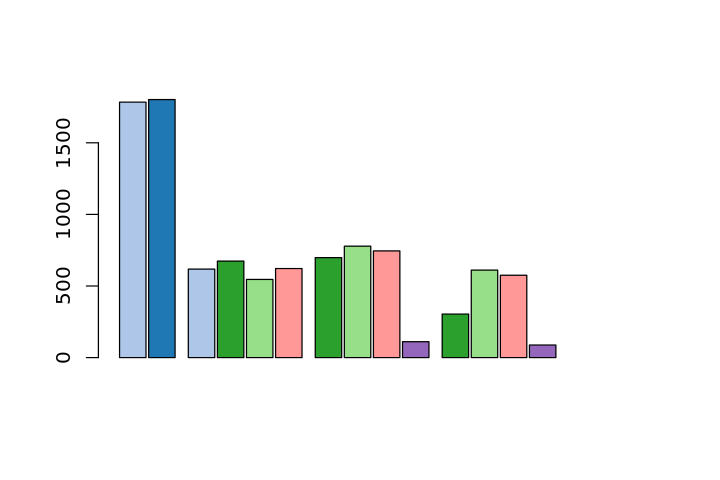

In [15]:
options(repr.plot.width = 6, repr.plot.height = 4)

my.xlim = c(0, 1810)
my.ylim = c(0,20)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1,0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtl), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_FPP, col_DA, col_Sert, col_Epen1, 
                col_DA, col_Sert, col_Epen1, col_Astro,
               col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [5]:
data_folder = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200103_data_freeze/"

In [6]:
#################################
####### leads
###############################

In [7]:
#################### lead eQTL file
### extract eQTL per day / cell type

In [8]:
leads_filename = paste0(data_folder,"eqtl/pool1_17.eqtl_discovery_all_leads.fdr0.1.tsv")
leads = read.csv(leads_filename, header = T, sep = "\t")
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,⋯,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,⋯,192.39730,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,⋯,34.96152,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11


In [319]:
unique(leads$n_samples)
unique(leads$n_e_samples)

[1] 173 172 165 151 133 152 179 171 175 137

[1] 173 172 165 151 133 152 179 171 175 137

In [6]:
nrow(leads)
eqtl = paste0(leads$feature_id,"-",leads$snp_id)
length(eqtl)
length(unique(eqtl))
length(unique(leads$feature_id))

[1] 12096

[1] 12096

[1] 9170

[1] 4087

In [7]:
T = 0.05   ## 5% FDR

In [8]:
##########
#### D11
##########
suffix = "_D11"
## FPP
leads.FPP.D11 = leads[leads$global_corr_p_value < T & leads$label == paste0("FPP",suffix),]
## P_FPP
leads.P_FPP.D11 = leads[leads$global_corr_p_value < T & leads$label == paste0("P_FPP",suffix),]

In [9]:
c("eQTL FDR 5%","tested genes","n samples", "cell type")
c(nrow(leads.FPP.D11),nrow(leads[leads$label==paste0("FPP",suffix),]),leads[leads$label == paste0("FPP",suffix),"n_samples"][1], "FPP")
c(nrow(leads.P_FPP.D11),nrow(leads[leads$label==paste0("P_FPP",suffix),]),leads[leads$label == paste0("P_FPP",suffix),"n_samples"][1],"P_FPP")

[1] "eQTL FDR 5%"  "tested genes" "n samples"    "cell type"

[1] "1784" "2180" "173"  "FPP"

[1] "1802"  "2134"  "172"   "P_FPP"

In [10]:
##########
#### D30
##########
suffix = "_D30"
## DA
leads.DA.D30 = leads[leads$global_corr_p_value < T & leads$label == paste0("DA",suffix),]
## Sert
leads.Sert.D30 = leads[leads$global_corr_p_value < T & leads$label == paste0("Sert",suffix),]
## Epen1
leads.Epen1.D30 = leads[leads$global_corr_p_value < T & leads$label == paste0("Epen1",suffix),]
## Astro
leads.Astro.D30 = leads[leads$global_corr_p_value < T & leads$label == paste0("Astro",suffix),]

In [11]:
c("eQTL FDR 5%","tested genes","n samples", "cell type")
c(nrow(leads.DA.D30),nrow(leads[leads$label==paste0("DA",suffix),]),leads[leads$label == paste0("DA",suffix),"n_samples"][1], "DA")
c(nrow(leads.Sert.D30),nrow(leads[leads$label==paste0("Sert",suffix),]),leads[leads$label == paste0("Sert",suffix),"n_samples"][1],"Sert")
c(nrow(leads.Epen1.D30),nrow(leads[leads$label==paste0("Epen1",suffix),]),leads[leads$label == paste0("Epen1",suffix),"n_samples"][1],"Epen1")
c(nrow(leads.Astro.D30),nrow(leads[leads$label==paste0("Astro",suffix),]),leads[leads$label == paste0("Astro",suffix),"n_samples"][1],"Astro")

[1] "eQTL FDR 5%"  "tested genes" "n samples"    "cell type"

[1] "674" "797" "165" "DA"

[1] "546"  "697"  "151"  "Sert"

[1] "622"   "785"   "133"   "Epen1"

[1] "618"   "790"   "152"   "Astro"

In [12]:
##########
#### D52
##########
suffix = "_D52"
## DA
leads.DA.D52 = leads[leads$global_corr_p_value < T & leads$label == paste0("DA",suffix),]
## Sert
leads.Sert.D52 = leads[leads$global_corr_p_value < T & leads$label == paste0("Sert",suffix),]
## Epen1
leads.Epen1.D52 = leads[leads$global_corr_p_value < T & leads$label == paste0("Epen1",suffix),]
## Astro
leads.Astro.D52 = leads[leads$global_corr_p_value < T & leads$label == paste0("Astro",suffix),]

In [13]:
c("eQTL FDR 1%","tested genes","n samples", "cell type")
c(nrow(leads.DA.D52),nrow(leads[leads$label==paste0("DA",suffix),]),leads[leads$label == paste0("DA",suffix),"n_samples"][1], "DA")
c(nrow(leads.Sert.D52),nrow(leads[leads$label==paste0("Sert",suffix),]),leads[leads$label == paste0("Sert",suffix),"n_samples"][1],"Sert")
c(nrow(leads.Epen1.D52),nrow(leads[leads$label==paste0("Epen1",suffix),]),leads[leads$label == paste0("Epen1",suffix),"n_samples"][1],"Epen1")
c(nrow(leads.Astro.D52),nrow(leads[leads$label==paste0("Astro",suffix),]),leads[leads$label == paste0("Astro",suffix),"n_samples"][1],"Astro")

[1] "eQTL FDR 1%"  "tested genes" "n samples"    "cell type"

[1] "935"  "1160" "179"  "DA"

[1] "1319" "1613" "171"  "Sert"

[1] "1253"  "1545"  "175"   "Epen1"

[1] "317"   "395"   "137"   "Astro"

In [14]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

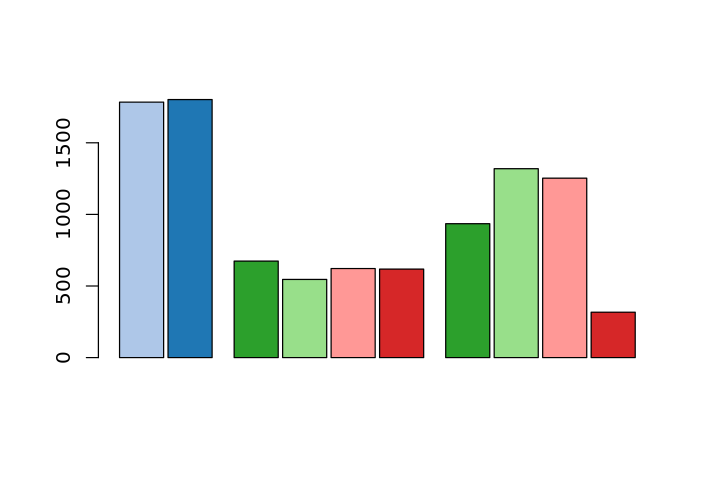

In [17]:
options(repr.plot.width = 6, repr.plot.height = 4)
eqtls <- c(1784,1802,
           674,546,622,618,
           935,1319,1253,317)


my.xlim = c(0, 1810)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [6]:
T = 0.01   ## 1% FDR

In [7]:
##########
#### D11
##########
suffix = "_D11"
## FPP
leads.FPP.D11 = leads[leads$global_corr_p_value < T & leads$label == paste0("FPP",suffix),]
## P_FPP
leads.P_FPP.D11 = leads[leads$global_corr_p_value < T & leads$label == paste0("P_FPP",suffix),]

In [8]:
c("eQTL FDR 1%","tested genes","n samples", "cell type")
c(nrow(leads.FPP.D11),nrow(leads[leads$label==paste0("FPP",suffix),]),leads[leads$label == paste0("FPP",suffix),"n_samples"][1], "FPP")
c(nrow(leads.P_FPP.D11),nrow(leads[leads$label==paste0("P_FPP",suffix),]),leads[leads$label == paste0("P_FPP",suffix),"n_samples"][1],"P_FPP")

[1] "eQTL FDR 1%"  "tested genes" "n samples"    "cell type"

[1] "1251" "2180" "173"  "FPP"

[1] "1276"  "2134"  "172"   "P_FPP"

In [9]:
##########
#### D30
##########
suffix = "_D30"
## DA
leads.DA.D30 = leads[leads$global_corr_p_value < T & leads$label == paste0("DA",suffix),]
## Sert
leads.Sert.D30 = leads[leads$global_corr_p_value < T & leads$label == paste0("Sert",suffix),]
## Epen1
leads.Epen1.D30 = leads[leads$global_corr_p_value < T & leads$label == paste0("Epen1",suffix),]
## Astro
leads.Astro.D30 = leads[leads$global_corr_p_value < T & leads$label == paste0("Astro",suffix),]

In [10]:
c("eQTL FDR 1%","tested genes","n samples", "cell type")
c(nrow(leads.DA.D30),nrow(leads[leads$label==paste0("DA",suffix),]),leads[leads$label == paste0("DA",suffix),"n_samples"][1], "DA")
c(nrow(leads.Sert.D30),nrow(leads[leads$label==paste0("Sert",suffix),]),leads[leads$label == paste0("Sert",suffix),"n_samples"][1],"Sert")
c(nrow(leads.Epen1.D30),nrow(leads[leads$label==paste0("Epen1",suffix),]),leads[leads$label == paste0("Epen1",suffix),"n_samples"][1],"Epen1")
c(nrow(leads.Astro.D30),nrow(leads[leads$label==paste0("Astro",suffix),]),leads[leads$label == paste0("Astro",suffix),"n_samples"][1],"Astro")

[1] "eQTL FDR 1%"  "tested genes" "n samples"    "cell type"

[1] "454" "797" "165" "DA"

[1] "357"  "697"  "151"  "Sert"

[1] "422"   "785"   "133"   "Epen1"

[1] "447"   "790"   "152"   "Astro"

In [11]:
##########
#### D52
##########
suffix = "_D52"
## DA
leads.DA.D52 = leads[leads$global_corr_p_value < T & leads$label == paste0("DA",suffix),]
## Sert
leads.Sert.D52 = leads[leads$global_corr_p_value < T & leads$label == paste0("Sert",suffix),]
## Epen1
leads.Epen1.D52 = leads[leads$global_corr_p_value < T & leads$label == paste0("Epen1",suffix),]
## Astro
leads.Astro.D52 = leads[leads$global_corr_p_value < T & leads$label == paste0("Astro",suffix),]

In [12]:
c("eQTL FDR 1%","tested genes","n samples", "cell type")
c(nrow(leads.DA.D52),nrow(leads[leads$label==paste0("DA",suffix),]),leads[leads$label == paste0("DA",suffix),"n_samples"][1], "DA")
c(nrow(leads.Sert.D52),nrow(leads[leads$label==paste0("Sert",suffix),]),leads[leads$label == paste0("Sert",suffix),"n_samples"][1],"Sert")
c(nrow(leads.Epen1.D52),nrow(leads[leads$label==paste0("Epen1",suffix),]),leads[leads$label == paste0("Epen1",suffix),"n_samples"][1],"Epen1")
c(nrow(leads.Astro.D52),nrow(leads[leads$label==paste0("Astro",suffix),]),leads[leads$label == paste0("Astro",suffix),"n_samples"][1],"Astro")

[1] "eQTL FDR 1%"  "tested genes" "n samples"    "cell type"

[1] "660"  "1160" "179"  "DA"

[1] "898"  "1613" "171"  "Sert"

[1] "872"   "1545"  "175"   "Epen1"

[1] "195"   "395"   "137"   "Astro"

In [13]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

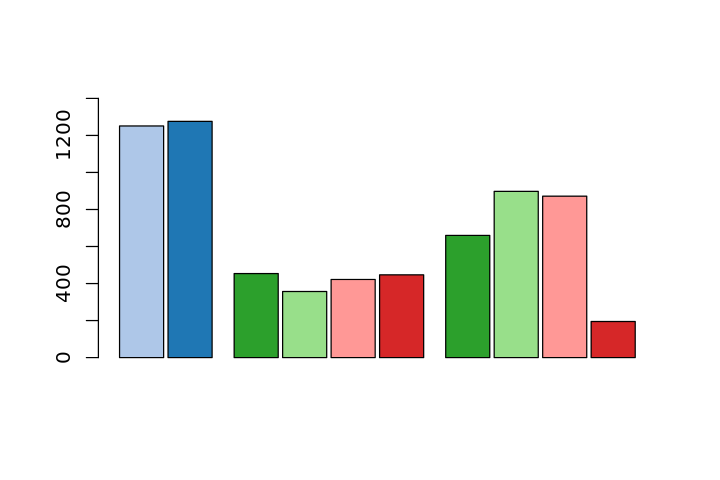

In [14]:
options(repr.plot.width = 6, repr.plot.height = 4)
eqtls <- c(1251,1276,
           454,357,422,447,
           660,898,872,195)


my.xlim = c(0, 1400)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


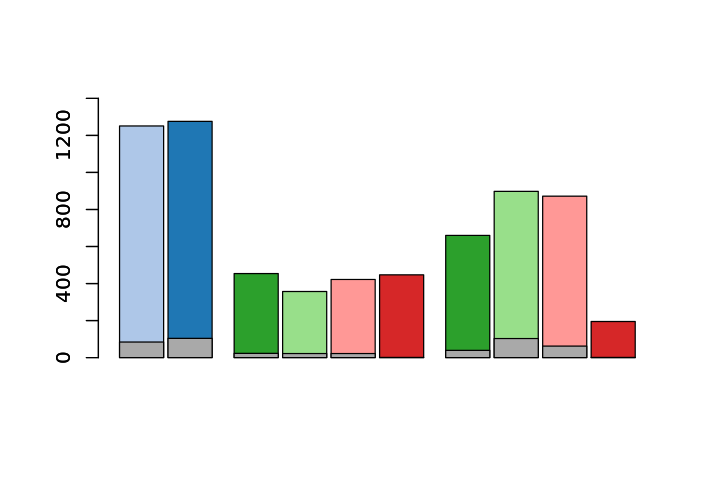

In [68]:
options(repr.plot.width = 6, repr.plot.height = 4)
eqtls <- c(1251,1276,
           454,357,422,447,
           660,898,872,195)

eqtls_shared <- c(84,104,
           23,22,22,1,
           39,103,62,1)


my.xlim = c(0, 1400)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "")#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)
barplot(as.numeric(eqtls_shared), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "darkgrey",
#         col = c(col_FPP, col_P_FPP,
#                 col_DA, col_Sert, col_Epen1, col_Astro,
#                 col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)

In [15]:
#################################
####### all results
###############################

In [16]:
#################### full results eQTL files

In [17]:
eqtl_folder = paste0(data_folder,"eqtl/summary_stats/")

In [18]:
### D11

In [19]:
## Floor Plate Progenitors (FPP)
FPP.D11_filename = paste0(eqtl_folder,"pool1_13_noddd_D11.FPP.qtl_results_all.sorted.txt.gz")
FPP.D11 = read.table(gzfile(FPP.D11_filename), header = TRUE)
# nrow(FPP.D11)
head(FPP.D11,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000187961,1_662622_G_A,0.05892175,-0.16135667,0.08542919,-1,1,895967,901095,173,173,1,662622,A,1,0.08092486,1
ENSG00000188290,1_662622_G_A,0.27968433,-0.06533425,0.06043711,-1,1,934342,935552,173,173,1,662622,A,1,0.08092486,1


In [20]:
## Proliferating Floor Plate Progenitors (P_FPP)
P_FPP.D11_filename = paste0(eqtl_folder,"pool1_13_noddd_D11.P_FPP.qtl_results_all.sorted.txt.gz")
P_FPP.D11 = read.table(gzfile(P_FPP.D11_filename), header = TRUE)
# nrow(P_FPP.D11)
head(P_FPP.D11,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000188290,1_662622_G_A,0.06319884,-0.1249683,0.06726719,-1,1,934342,935552,172,172,1,662622,A,1,0.08139535,1
ENSG00000131591,1_662622_G_A,0.09762762,0.1412883,0.08529503,-1,1,1017198,1051741,172,172,1,662622,A,1,0.08139535,1


In [21]:
## Neuroblasts (NB)
NB.D11_filename = paste0(eqtl_folder,"pool1_13_noddd_D11.NB.qtl_results_all.sorted.txt.gz")
NB.D11 = read.table(gzfile(NB.D11_filename), header = TRUE)
# nrow(NB.D11)
head(NB.D11,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000131591,1_662622_G_A,0.06410005,0.3010119,0.1625788,-1,1,1017198,1051741,78,78,1,662622,A,1,0.08333333,0.4197149
ENSG00000078808,1_662622_G_A,0.18017883,0.2087329,0.1557470,-1,1,1152288,1167411,78,78,1,662622,A,1,0.08333333,0.4197149


In [22]:
### D30

In [23]:
## Dopaminergic neurons (DA)
DA.D30_filename = paste0(eqtl_folder,"pool1_13_noddd_D30.DA.qtl_results_all.sorted.txt.gz")
DA.D30 = read.table(gzfile(DA.D30_filename), header = TRUE)
# nrow(DA.D30)
head(DA.D30,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000131591,1_662622_G_A,0.007208418,-0.2738275,0.1019060,-1,1,1017198,1051741,165,165,1,662622,A,1,0.08787879,1
ENSG00000187608,1_662622_G_A,0.206927925,0.1567687,0.1242167,-1,1,948803,949920,165,165,1,662622,A,1,0.08787879,1


In [24]:
# Serotonergic neurons (Sert)
Sert.D30_filename = paste0(eqtl_folder,"pool1_13_noddd_D30.Sert.qtl_results_all.sorted.txt.gz")
Sert.D30 = read.table(gzfile(Sert.D30_filename), header = TRUE)
# nrow(Sert.D30)
head(Sert.D30,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000131591,1_662622_G_A,0.01828746,-0.2618217,0.1109533,-1,1,1017198,1051741,151,151,1,662622,A,1,0.08278146,1
ENSG00000187608,1_662622_G_A,0.16177672,0.2081616,0.1487803,-1,1,948803,949920,151,151,1,662622,A,1,0.08278146,1


In [25]:
# Ependymal cells (Epen1)
Epen1.D30_filename = paste0(eqtl_folder,"pool1_13_noddd_D30.Epen1.qtl_results_all.sorted.txt.gz")
Epen1.D30 = read.table(gzfile(Epen1.D30_filename), header = TRUE)
# nrow(Epen1.D30)
head(Epen1.D30,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000187634,1_662622_G_A,0.3395437,0.1366921,0.1431230,-1,1,860260,879955,133,133,1,662622,A,1,0.07518797,0.5377241
ENSG00000188157,1_662622_G_A,0.3950862,0.1057316,0.1243273,-1,1,955503,991496,133,133,1,662622,A,1,0.07518797,0.5377241


In [26]:
# Astrocyte-like cells (Astro)
Astro.D30_filename = paste0(eqtl_folder,"pool1_13_noddd_D30.Astro.qtl_results_all.sorted.txt.gz")
Astro.D30 = read.table(gzfile(Astro.D30_filename), header = TRUE)
# nrow(Astro.D30)
head(Astro.D30,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000188976,1_662622_G_A,0.02454912,-0.1824965,0.08116636,-1,1,879584,894689,152,152,1,662622,A,1,0.08223684,1
ENSG00000131591,1_662622_G_A,0.12423359,-0.1664452,0.10827510,-1,1,1017198,1051741,152,152,1,662622,A,1,0.08223684,1


In [27]:
### D52

In [28]:
## Dopaminergic neurons (DA)
DA.D52_filename = paste0(eqtl_folder,"pool1_17_D52.DA.qtl_results_all.sorted.txt.gz")
DA.D52 = read.table(gzfile(DA.D52_filename), header = TRUE)
# nrow(DA.D52)
head(DA.D52,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000131591,1_662622_G_A,0.002053446,0.3233397,0.10489897,-1,1,1017198,1051741,179,179,1,662622,A,1,0.07541899,1
ENSG00000187634,1_662622_G_A,0.194135506,0.1091702,0.08407787,-1,1,860260,879955,179,179,1,662622,A,1,0.07541899,1


In [29]:
# Serotonergic neurons (Sert)
Sert.D52_filename = paste0(eqtl_folder,"pool1_17_D52.Sert.qtl_results_all.sorted.txt.gz")
Sert.D52 = read.table(gzfile(Sert.D52_filename), header = TRUE)
# nrow(Sert.D52)
head(Sert.D52,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000187634,1_662622_G_A,0.1110078,0.11317710,0.07101622,-1,1,860260,879955,171,171,1,662622,A,1,0.08187135,1
ENSG00000188976,1_662622_G_A,0.4567408,0.03914145,0.05259362,-1,1,879584,894689,171,171,1,662622,A,1,0.08187135,1


In [30]:
# Ependymal cells (Epen1)
Epen1.D52_filename = paste0(eqtl_folder,"pool1_17_D52.Epen1.qtl_results_all.sorted.txt.gz")
Epen1.D52 = read.table(gzfile(Epen1.D52_filename), header = TRUE)
# nrow(Epen1.D52)
head(Epen1.D52,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000078808,1_662622_G_A,0.04829529,-0.1114908,0.05645786,-1,1,1152288,1167411,175,175,1,662622,A,1,0.08,1
ENSG00000187961,1_662622_G_A,0.10861662,-0.1970720,0.12282897,-1,1,895967,901095,175,175,1,662622,A,1,0.08,1


In [31]:
# Astrocytes (Astro)
Astro.D52_filename = paste0(eqtl_folder,"pool1_17_D52.Astro.qtl_results_all.sorted.txt.gz")
Astro.D52 = read.table(gzfile(Astro.D52_filename), header = TRUE)
# nrow(Astro.D52)
head(Astro.D52,2)

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000188157,1_662622_G_A,0.01245247,0.3078448,0.1231845,-1,1,955503,991496,137,137,1,662622,A,1,0.08394161,1
ENSG00000187634,1_662622_G_A,0.05106728,0.2849205,0.1460446,-1,1,860260,879955,137,137,1,662622,A,1,0.08394161,1


In [39]:
# library(dplyr)

In [40]:
shared_eqtl = function(leads, results, T = 0.05){
    res = inner_join(leads, results, by = c("snp_id","feature_id"), suffix = c(".leads",".results"))
    # sharing defined as nominal significance (T) and same direction of effect
    res[(res$p_value.results < T & (res$beta.results * res$beta.leads) > 0),]
}

In [41]:
T = 0.05

In [42]:
#################### 
######### D11

In [43]:
#############
# FPP

In [44]:
# D11
FPP_in_P_FPP = shared_eqtl(leads.FPP.D11, P_FPP.D11, T)
# D30
FPP_in_DA.D30 = shared_eqtl(leads.FPP.D11, DA.D30, T)
FPP_in_Sert.D30 = shared_eqtl(leads.FPP.D11, Sert.D30, T)
FPP_in_Epen1.D30 = shared_eqtl(leads.FPP.D11, Epen1.D30, T)
FPP_in_Astro.D30 = shared_eqtl(leads.FPP.D11, Astro.D30, T)
# D52
FPP_in_DA.D52 = shared_eqtl(leads.FPP.D11, DA.D52, T)
FPP_in_Sert.D52 = shared_eqtl(leads.FPP.D11, Sert.D52, T)
FPP_in_Epen1.D52 = shared_eqtl(leads.FPP.D11, Epen1.D52, T)
FPP_in_Astro.D52 = shared_eqtl(leads.FPP.D11, Astro.D52, T)

In [45]:
## all eGenes
length(unique(leads.FPP.D11$feature_id))

## eGenes in FPP but not shared in any cell types at D30, D52 (however possibly shared with P_FPP D11)
shared_genes = unique(c(FPP_in_DA.D30$feature_id, FPP_in_Sert.D30$feature_id,
                       FPP_in_Epen1.D30$feature_id, FPP_in_Astro.D30$feature_id,
                       FPP_in_DA.D52$feature_id, FPP_in_Sert.D52$feature_id,
                       FPP_in_Epen1.D52$feature_id, FPP_in_Astro.D52$feature_id))
FPP_eGenes_not_in_D30_D52 = leads.FPP.D11$feature_id[!(leads.FPP.D11$feature_id %in% shared_genes )]
length(FPP_eGenes_not_in_D30_D52)

## eGenes in FPP only (also no P_FPP)
shared_genes1 = unique(c(shared_genes, FPP_in_P_FPP$feature_id))
FPP_unique_eGenes = leads.FPP.D11$feature_id[!(leads.FPP.D11$feature_id %in% shared_genes1 )]
length(FPP_unique_eGenes)

[1] 1248

[1] 84

[1] 3

In [46]:
#############
# P_FPP

In [47]:
# D11
P_FPP_in_FPP = shared_eqtl(leads.P_FPP.D11, FPP.D11, T)
# D30
P_FPP_in_DA.D30 = shared_eqtl(leads.P_FPP.D11, DA.D30, T)
P_FPP_in_Sert.D30 = shared_eqtl(leads.P_FPP.D11, Sert.D30, T)
P_FPP_in_Epen1.D30 = shared_eqtl(leads.P_FPP.D11, Epen1.D30, T)
P_FPP_in_Astro.D30 = shared_eqtl(leads.P_FPP.D11, Astro.D30, T)
# D52
P_FPP_in_DA.D52 = shared_eqtl(leads.P_FPP.D11, DA.D52, T)
P_FPP_in_Sert.D52 = shared_eqtl(leads.P_FPP.D11, Sert.D52, T)
P_FPP_in_Epen1.D52 = shared_eqtl(leads.P_FPP.D11, Epen1.D52, T)
P_FPP_in_Astro.D52 = shared_eqtl(leads.P_FPP.D11, Astro.D52, T)

In [48]:
## all eGenes
length(unique(leads.P_FPP.D11$feature_id))

## eGenes in FPP but not shared in any cell types at D30, D52 (possibly shared with P_FPP D11)
shared_genes = unique(c(P_FPP_in_DA.D30$feature_id,   P_FPP_in_Sert.D30$feature_id,
                       P_FPP_in_Epen1.D30$feature_id, P_FPP_in_Astro.D30$feature_id,
                       P_FPP_in_DA.D52$feature_id,    P_FPP_in_Sert.D52$feature_id,
                       P_FPP_in_Epen1.D52$feature_id, P_FPP_in_Astro.D52$feature_id))

P_FPP_eGenes_not_in_D30_D52 = leads.P_FPP.D11$feature_id[!(leads.P_FPP.D11$feature_id %in% shared_genes)]
length(P_FPP_eGenes_not_in_D30_D52)

## eGenes in FPP only (also not shared with P_FPP)
shared_genes1 = unique(c(shared_genes, P_FPP_in_FPP$feature_id))

P_FPP_unique_eGenes = leads.P_FPP.D11$feature_id[!(leads.P_FPP.D11$feature_id %in% shared_genes1)]
length(P_FPP_unique_eGenes)

[1] 1275

[1] 104

[1] 15

In [49]:
#################### 
######### D30
#############

In [50]:
# DA

In [51]:
# D11
DA.D30_in_FPP   = shared_eqtl(leads.DA.D30, FPP.D11, T)
DA.D30_in_P_FPP = shared_eqtl(leads.DA.D30, P_FPP.D11, T)
# D30
DA.D30_in_Sert.D30  = shared_eqtl(leads.DA.D30, Sert.D30, T)
DA.D30_in_Epen1.D30 = shared_eqtl(leads.DA.D30, Epen1.D30, T)
DA.D30_in_Astro.D30 = shared_eqtl(leads.DA.D30, Astro.D30, T)
# D52
DA.D30_in_DA.D52    = shared_eqtl(leads.DA.D30, DA.D52, T)
DA.D30_in_Sert.D52  = shared_eqtl(leads.DA.D30, Sert.D52, T)
DA.D30_in_Epen1.D52 = shared_eqtl(leads.DA.D30, Epen1.D52, T)
DA.D30_in_Astro.D52 = shared_eqtl(leads.DA.D30, Astro.D52, T)

In [52]:
## all eGenes 
length(unique(leads.DA.D30$feature_id))

## eGenes in DA D30 but not shared in any cell types at D11, D52 (except DA, Sert)
shared_genes = unique(c(DA.D30_in_Epen1.D52$feature_id, DA.D30_in_Astro.D52$feature_id,
                        DA.D30_in_FPP$feature_id,       DA.D30_in_P_FPP$feature_id))

DA.D30_eGenes_not_in_D11_D52_noDA_noSert = leads.DA.D30$feature_id[!(leads.DA.D30$feature_id %in% shared_genes)]
length(DA.D30_eGenes_not_in_D11_D52_noDA_noSert)


## eGenes in DA D30 but not shared in any cell types at D11, D30 (except DA, Sert), D52 (except DA, Sert)
shared_genes1 = unique(c(shared_genes, DA.D30_in_Epen1.D30$feature_id, DA.D30_in_Astro.D30$feature_id))

DA.D30_eGenes_not_in_D11_D30_D52_noDA_noSert = leads.DA.D30$feature_id[!(leads.DA.D30$feature_id %in% shared_genes1)]
length(DA.D30_eGenes_not_in_D11_D30_D52_noDA_noSert)


## eGenes in DA D30 but not shared in any cell types at D11, D30 (except DA), D52 (except DA)
shared_genes2 = unique(c(shared_genes1, DA.D30_in_Sert.D30$feature_id, DA.D30_in_Sert.D52$feature_id))
DA.D30_eGenes_not_in_D11_D30_D52_noDA = leads.DA.D30$feature_id[!(leads.DA.D30$feature_id %in% shared_genes2)]
length(DA.D30_eGenes_not_in_D11_D30_D52_noDA)


## eGenes in DA D30 but not shared in any cell types at D11, D30 (except DA), D52 (including DA)
shared_genes3 = unique(c(shared_genes2, DA.D30_in_DA.D52$feature_id))
DA.D30_unique_eGenes = leads.DA.D30$feature_id[!(leads.DA.D30$feature_id %in% shared_genes3)]
length(DA.D30_unique_eGenes)

[1] 453

[1] 23

[1] 12

[1] 6

[1] 1

In [53]:
#############
# Sert
# D11
Sert.D30_in_FPP   = shared_eqtl(leads.Sert.D30, FPP.D11, T)
Sert.D30_in_P_FPP = shared_eqtl(leads.Sert.D30, P_FPP.D11, T)
# D30
Sert.D30_in_DA.D30    = shared_eqtl(leads.Sert.D30, DA.D30, T)
Sert.D30_in_Epen1.D30 = shared_eqtl(leads.Sert.D30, Epen1.D30, T)
Sert.D30_in_Astro.D30 = shared_eqtl(leads.Sert.D30, Astro.D30, T)
# D52
Sert.D30_in_DA.D52    = shared_eqtl(leads.Sert.D30, DA.D52, T)
Sert.D30_in_Sert.D52  = shared_eqtl(leads.Sert.D30, Sert.D52, T)
Sert.D30_in_Epen1.D52 = shared_eqtl(leads.Sert.D30, Epen1.D52, T)
Sert.D30_in_Astro.D52 = shared_eqtl(leads.Sert.D30, Astro.D52, T)

In [54]:
## eGenes
length(unique(leads.Sert.D30$feature_id))

## eGenes in Sert D30 but not shared in any cell types at D11, D52 (except Sert,DA)
shared_genes = unique(c(Sert.D30_in_Epen1.D52$feature_id, Sert.D30_in_Astro.D52$feature_id,
                        Sert.D30_in_FPP$feature_id,       Sert.D30_in_P_FPP$feature_id))

Sert.D30_eGenes_not_in_D11_D52_noSert_noDA = leads.Sert.D30$feature_id[!(leads.Sert.D30$feature_id %in% shared_genes)]
length(Sert.D30_eGenes_not_in_D11_D52_noSert_noDA)


## eGenes in Sert D30 but not shared in any cell types at D11, D30 (except DA, Sert), D52 (except DA, Sert)
shared_genes1 = unique(c(shared_genes, Sert.D30_in_Epen1.D30$feature_id, Sert.D30_in_Astro.D30$feature_id))
Sert.D30_eGenes_not_in_D11_D30_D52_noSert_noDA = leads.Sert.D30$feature_id[!(leads.Sert.D30$feature_id %in% shared_genes1)]
length(Sert.D30_eGenes_not_in_D11_D30_D52_noSert_noDA)

## eGenes in Sert D30 but not shared in any cell types at D11, D30 (except Sert), D52 (except Sert)
shared_genes2 = unique(c(shared_genes1, Sert.D30_in_DA.D30$feature_id, Sert.D30_in_DA.D52$feature_id)) 
Sert.D30_eGenes_not_in_D11_D30_D52_noSert = leads.Sert.D30$feature_id[!(leads.Sert.D30$feature_id %in% shared_genes2)]
length(Sert.D30_eGenes_not_in_D11_D30_D52_noSert)

## eGenes in Sert D30 but not shared in any cell types at D11, D30 (except Sert), D52 (including Sert)
shared_genes3 = unique(c(shared_genes2, Sert.D30_in_Sert.D52$feature_id))
Sert.D30_unique_eGenes = leads.Sert.D30$feature_id[!(leads.Sert.D30$feature_id %in% shared_genes3)]
length(Sert.D30_unique_eGenes)

[1] 356

[1] 22

[1] 13

[1] 8

[1] 0

In [55]:
#############
# Epen1
# D11
Epen1.D30_in_FPP   = shared_eqtl(leads.Epen1.D30, FPP.D11, T)
Epen1.D30_in_P_FPP = shared_eqtl(leads.Epen1.D30, P_FPP.D11, T)
# D30
Epen1.D30_in_DA.D30    = shared_eqtl(leads.Epen1.D30, DA.D30, T)
Epen1.D30_in_Sert.D30  = shared_eqtl(leads.Epen1.D30, Sert.D30, T)
Epen1.D30_in_Astro.D30 = shared_eqtl(leads.Epen1.D30, Astro.D30, T)
# D52
Epen1.D30_in_DA.D52    = shared_eqtl(leads.Epen1.D30, DA.D52, T)
Epen1.D30_in_Sert.D52  = shared_eqtl(leads.Epen1.D30, Sert.D52, T)
Epen1.D30_in_Epen1.D52 = shared_eqtl(leads.Epen1.D30, Epen1.D52, T)
Epen1.D30_in_Astro.D52 = shared_eqtl(leads.Epen1.D30, Astro.D52, T)

In [56]:
## eGenes
length(unique(leads.Epen1.D30$feature_id))

## eGenes in Epen1 D30 but not shared in any cell types at D11, D52 (except Epen1)
shared_genes = unique(c(Epen1.D30_in_DA.D52$feature_id, 
                        Epen1.D30_in_Sert.D52$feature_id, 
                        Epen1.D30_in_Astro.D52$feature_id,
                        Epen1.D30_in_FPP$feature_id,    
                        Epen1.D30_in_P_FPP$feature_id))

Epen1.D30_eGenes_not_in_D11_D52_noEpen1 = leads.Epen1.D30$feature_id[!(leads.Epen1.D30$feature_id %in% shared_genes)]
length(Epen1.D30_eGenes_not_in_D11_D52_noEpen1)


## eGenes in Epen1 D30 but not shared in any cell types at D11, D30 (except Epen1), D52 (except Epen1)
shared_genes1 = unique(c(shared_genes, Epen1.D30_in_DA.D30$feature_id, 
                                       Epen1.D30_in_Sert.D30$feature_id, 
                                       Epen1.D30_in_Astro.D30$feature_id))

Epen1.D30_eGenes_not_in_D11_D30_D52_noEpen1 = leads.Epen1.D30$feature_id[!(leads.Epen1.D30$feature_id %in% shared_genes1)]
length(Epen1.D30_eGenes_not_in_D11_D30_D52_noEpen1)

## eGenes in Epen1 D30 but not shared in any cell types at D11, D30 (except Epen1), D52 (including Epen1)
shared_genes2 = unique(c(shared_genes1, Epen1.D30_in_Epen1.D52$feature_id))
Epen1.D30_unique_eGenes = leads.Epen1.D30$feature_id[!(leads.Epen1.D30$feature_id %in% shared_genes2)]
length(Epen1.D30_unique_eGenes)

[1] 421

[1] 22

[1] 14

[1] 1

In [57]:
#############
# Astro
# D11
Astro.D30_in_FPP   = shared_eqtl(leads.Astro.D30, FPP.D11, T)
Astro.D30_in_P_FPP = shared_eqtl(leads.Astro.D30, P_FPP.D11, T)
# D30
Astro.D30_in_DA.D30    = shared_eqtl(leads.Astro.D30, DA.D30, T)
Astro.D30_in_Sert.D30  = shared_eqtl(leads.Astro.D30, Sert.D30, T)
Astro.D30_in_Epen1.D30 = shared_eqtl(leads.Astro.D30, Epen1.D30, T)
# D52
Astro.D30_in_DA.D52    = shared_eqtl(leads.Astro.D30, DA.D52, T)
Astro.D30_in_Sert.D52  = shared_eqtl(leads.Astro.D30, Sert.D52, T)
Astro.D30_in_Epen1.D52 = shared_eqtl(leads.Astro.D30, Epen1.D52, T)
Astro.D30_in_Astro.D52 = shared_eqtl(leads.Astro.D30, Astro.D52, T)

In [67]:
## eGenes
length(unique(leads.Astro.D30$feature_id))

## eGenes in Astro D30 but not shared in any cell types at D11, D52 (except Astro)
shared_genes = unique(c(Astro.D30_in_DA.D52$feature_id, 
                        Astro.D30_in_Sert.D52$feature_id, 
                        Astro.D30_in_Epen1.D52$feature_id,
                        Astro.D30_in_FPP$feature_id,    
                        Astro.D30_in_P_FPP$feature_id))

Astro.D30_eGenes_not_in_D11_D52_noAstro = leads.Astro.D30$feature_id[!(leads.Astro.D30$feature_id %in% shared_genes)]
length(Astro.D30_eGenes_not_in_D11_D52_noAstro)


## eGenes in Astro D30 but not shared in any cell types at D11, D30 (except Astro), D52 (except Astro)
shared_genes1 = unique(c(shared_genes, Astro.D30_in_DA.D30$feature_id, 
                                       Astro.D30_in_Sert.D30$feature_id, 
                                       Astro.D30_in_Epen1.D30$feature_id))

Astro.D30_eGenes_not_in_D11_D30_D52_noAstro = leads.Astro.D30$feature_id[!(leads.Astro.D30$feature_id %in% shared_genes1)]
length(Astro.D30_eGenes_not_in_D11_D30_D52_noAstro)

## eGenes in Astro D30 but not shared in any cell types at D11, D30 (except Astro), D52 (including Astro)
shared_genes2 = unique(c(shared_genes1, Astro.D30_in_Astro.D52$feature_id))
Astro.D30_unique_eGenes = leads.Astro.D30$feature_id[!(leads.Astro.D30$feature_id %in% shared_genes2)]
length(Astro.D30_unique_eGenes)

[1] 446

[1] 1

[1] 1

[1] 0

In [58]:
#################### 
######### D52
#############
# DA
# D11
DA.D52_in_FPP   = shared_eqtl(leads.DA.D52, FPP.D11, T)
DA.D52_in_P_FPP = shared_eqtl(leads.DA.D52, P_FPP.D11, T)
# D30
DA.D52_in_DA.D30    = shared_eqtl(leads.DA.D52, DA.D30, T)
DA.D52_in_Sert.D30  = shared_eqtl(leads.DA.D52, Sert.D30, T)
DA.D52_in_Epen1.D30 = shared_eqtl(leads.DA.D52, Epen1.D30, T)
DA.D52_in_Astro.D30 = shared_eqtl(leads.DA.D52, Astro.D30, T)
# D52
DA.D52_in_Sert.D52  = shared_eqtl(leads.DA.D52, Sert.D52, T)
DA.D52_in_Epen1.D52 = shared_eqtl(leads.DA.D52, Epen1.D52, T)
DA.D52_in_Astro.D52 = shared_eqtl(leads.DA.D52, Astro.D52, T)

In [59]:
## all eGenes
length(unique(leads.DA.D52$feature_id))

## eGenes in DA D52 but not shared in any cell types at D11, D30 (except DA, Sert)
shared_genes = unique(c(DA.D52_in_Epen1.D30$feature_id, DA.D52_in_Astro.D30$feature_id,
                        DA.D52_in_FPP$feature_id,       DA.D52_in_P_FPP$feature_id))

DA.D52_eGenes_not_in_D11_D30_noDA_noSert = leads.DA.D52$feature_id[!(leads.DA.D52$feature_id %in% shared_genes)]
length(DA.D52_eGenes_not_in_D11_D30_noDA_noSert)


## eGenes in DA D52 but not shared in any cell types at D11, D30 (except DA, Sert), D52 (except DA, Sert)
shared_genes1 = unique(c(shared_genes, DA.D52_in_Epen1.D52$feature_id, DA.D52_in_Astro.D52$feature_id))

DA.D52_eGenes_not_in_D11_D30_D52_noDA_noSert = leads.DA.D52$feature_id[!(leads.DA.D52$feature_id %in% shared_genes1)]
length(DA.D52_eGenes_not_in_D11_D30_D52_noDA_noSert)


## eGenes in DA D52 but not shared in any cell types at D11, D30 (except DA), D52 (except DA)
shared_genes2 = unique(c(shared_genes1, DA.D52_in_Sert.D30$feature_id, DA.D52_in_Sert.D52$feature_id))
DA.D52_eGenes_not_in_D11_D30_D52_noDA = leads.DA.D52$feature_id[!(leads.DA.D52$feature_id %in% shared_genes2)]
length(DA.D52_eGenes_not_in_D11_D30_D52_noDA)


## eGenes in DA D52 but not shared in any cell types at D11, D30 (including DA), D52 (except DA)
shared_genes3 = unique(c(shared_genes2, DA.D52_in_DA.D30$feature_id))
DA.D52_unique_eGenes = leads.DA.D52$feature_id[!(leads.DA.D52$feature_id %in% shared_genes3)]
length(DA.D52_unique_eGenes)

[1] 658

[1] 39

[1] 23

[1] 13

[1] 4

In [60]:
#############
# Sert
# D11
Sert.D52_in_FPP   = shared_eqtl(leads.Sert.D52, FPP.D11, T)
Sert.D52_in_P_FPP = shared_eqtl(leads.Sert.D52, P_FPP.D11, T)
# D30
Sert.D52_in_DA.D30    = shared_eqtl(leads.Sert.D52, DA.D30, T)
Sert.D52_in_Sert.D30  = shared_eqtl(leads.Sert.D52, Sert.D30, T)
Sert.D52_in_Epen1.D30 = shared_eqtl(leads.Sert.D52, Epen1.D30, T)
Sert.D52_in_Astro.D30 = shared_eqtl(leads.Sert.D52, Astro.D30, T)
# D52
Sert.D52_in_DA.D52    = shared_eqtl(leads.Sert.D52, DA.D52, T)
Sert.D52_in_Epen1.D52 = shared_eqtl(leads.Sert.D52, Epen1.D52, T)
Sert.D52_in_Astro.D52 = shared_eqtl(leads.Sert.D52, Astro.D52, T)

In [65]:
## eGenes
length(unique(leads.Sert.D52$feature_id))

## eGenes in Sert D52 but not shared in any cell types at D11, D30 (except Sert,DA)
shared_genes = unique(c(Sert.D52_in_Epen1.D30$feature_id, Sert.D52_in_Astro.D30$feature_id,
                        Sert.D52_in_FPP$feature_id,       Sert.D52_in_P_FPP$feature_id))

Sert.D52_eGenes_not_in_D11_D30_noSert_noDA = leads.Sert.D52$feature_id[!(leads.Sert.D52$feature_id %in% shared_genes)]
length(Sert.D52_eGenes_not_in_D11_D30_noSert_noDA)


## eGenes in Sert D52 but not shared in any cell types at D11, D30 (except DA, Sert), D52 (except DA, Sert)
shared_genes1 = unique(c(shared_genes, Sert.D52_in_Epen1.D30$feature_id, Sert.D30_in_Astro.D30$feature_id))
Sert.D52_eGenes_not_in_D11_D30_D52_noSert_noDA = leads.Sert.D30$feature_id[!(leads.Sert.D30$feature_id %in% shared_genes1)]
length(Sert.D52_eGenes_not_in_D11_D30_D52_noSert_noDA)

## eGenes in Sert D52 but not shared in any cell types at D11, D30 (except Sert), D52 (except Sert)
shared_genes2 = unique(c(shared_genes1, Sert.D52_in_DA.D52$feature_id, Sert.D52_in_DA.D52$feature_id)) 
Sert.D52_eGenes_not_in_D11_D30_D52_noSert = leads.Sert.D52$feature_id[!(leads.Sert.D52$feature_id %in% shared_genes2)]
length(Sert.D52_eGenes_not_in_D11_D30_D52_noSert)

## eGenes in Sert D52 but not shared in any cell types at D11, D30 (including Sert), D52 (except Sert)
shared_genes3 = unique(c(shared_genes2, Sert.D52_in_Sert.D30$feature_id))
Sert.D52_unique_eGenes = leads.Sert.D52$feature_id[!(leads.Sert.D52$feature_id %in% shared_genes3)]
length(Sert.D52_unique_eGenes)

[1] 897

[1] 103

[1] 20

[1] 69

[1] 24

In [61]:
#############
# Epen1
# D11
Epen1.D52_in_FPP   = shared_eqtl(leads.Epen1.D52, FPP.D11, T)
Epen1.D52_in_P_FPP = shared_eqtl(leads.Epen1.D52, P_FPP.D11, T)
# D30
Epen1.D52_in_DA.D30    = shared_eqtl(leads.Epen1.D52, DA.D30, T)
Epen1.D52_in_Sert.D30  = shared_eqtl(leads.Epen1.D52, Sert.D30, T)
Epen1.D52_in_Epen1.D30 = shared_eqtl(leads.Epen1.D52, Epen1.D30, T)
Epen1.D52_in_Astro.D30 = shared_eqtl(leads.Epen1.D52, Astro.D30, T)
# D52
Epen1.D52_in_DA.D52    = shared_eqtl(leads.Epen1.D52, DA.D52, T)
Epen1.D52_in_Sert.D52  = shared_eqtl(leads.Epen1.D52, Sert.D52, T)
Epen1.D52_in_Astro.D52 = shared_eqtl(leads.Epen1.D52, Astro.D52, T)

In [62]:
## eGenes
length(unique(leads.Epen1.D52$feature_id))

## eGenes in Epen1 D52 but not shared in any cell types at D11, D30 (except Epen1)
shared_genes = unique(c(Epen1.D52_in_DA.D30$feature_id, 
                        Epen1.D52_in_Sert.D30$feature_id, 
                        Epen1.D52_in_Astro.D30$feature_id,
                        Epen1.D52_in_FPP$feature_id,    
                        Epen1.D52_in_P_FPP$feature_id))

Epen1.D52_eGenes_not_in_D11_D30_noEpen1 = leads.Epen1.D52$feature_id[!(leads.Epen1.D52$feature_id %in% shared_genes)]
length(Epen1.D52_eGenes_not_in_D11_D30_noEpen1)


## eGenes in Epen1 D52 but not shared in any cell types at D11, D30 (except Epen1), D52 (except Epen1)
shared_genes1 = unique(c(shared_genes, Epen1.D52_in_DA.D52$feature_id, 
                                       Epen1.D52_in_Sert.D52$feature_id, 
                                       Epen1.D52_in_Astro.D52$feature_id))

Epen1.D52_eGenes_not_in_D11_D30_D52_noEpen1 = leads.Epen1.D52$feature_id[!(leads.Epen1.D52$feature_id %in% shared_genes1)]
length(Epen1.D52_eGenes_not_in_D11_D30_D52_noEpen1)

## eGenes in Epen1 D52 but not shared in any cell types at D11, D30 (including Epen1), D52 (except Epen1)
shared_genes2 = unique(c(shared_genes1, Epen1.D52_in_Epen1.D30$feature_id))
Epen1.D52_unique_eGenes = leads.Epen1.D52$feature_id[!(leads.Epen1.D52$feature_id %in% shared_genes2)]
length(Epen1.D52_unique_eGenes)

[1] 870

[1] 62

[1] 36

[1] 12

In [63]:
#############
# Astro
# D11
Astro.D52_in_FPP   = shared_eqtl(leads.Astro.D52, FPP.D11, T)
Astro.D52_in_P_FPP = shared_eqtl(leads.Astro.D52, P_FPP.D11, T)
# D30
Astro.D52_in_DA.D30    = shared_eqtl(leads.Astro.D52, DA.D30, T)
Astro.D52_in_Sert.D30  = shared_eqtl(leads.Astro.D52, Sert.D30, T)
Astro.D52_in_Epen1.D30 = shared_eqtl(leads.Astro.D52, Epen1.D30, T)
Astro.D52_in_Astro.D30 = shared_eqtl(leads.Astro.D52, Astro.D30, T)
# D52
Astro.D52_in_DA.D52    = shared_eqtl(leads.Astro.D52, DA.D52, T)
Astro.D52_in_Sert.D52  = shared_eqtl(leads.Astro.D52, Sert.D52, T)
Astro.D52_in_Epen1.D52 = shared_eqtl(leads.Astro.D52, Epen1.D52, T)

In [69]:
## eGenes
length(unique(leads.Astro.D52$feature_id))

## eGenes in Astro D52 but not shared in any cell types at D11, D30 (except Astro)
shared_genes = unique(c(Astro.D52_in_DA.D30$feature_id, 
                        Astro.D52_in_Sert.D30$feature_id, 
                        Astro.D52_in_Epen1.D30$feature_id,
                        Astro.D52_in_FPP$feature_id,    
                        Astro.D52_in_P_FPP$feature_id))

Astro.D52_eGenes_not_in_D11_D30_noAstro = leads.Astro.D52$feature_id[!(leads.Astro.D52$feature_id %in% shared_genes)]
length(Astro.D52_eGenes_not_in_D11_D30_noAstro)


## eGenes in Astro D52 but not shared in any cell types at D11, D30 (except Astro), D52 (except Astro)
shared_genes1 = unique(c(shared_genes, Astro.D52_in_DA.D52$feature_id, 
                                       Astro.D52_in_Sert.D52$feature_id, 
                                       Astro.D52_in_Epen1.D52$feature_id))

Astro.D52_eGenes_not_in_D11_D30_D52_noAstro = leads.Astro.D52$feature_id[!(leads.Astro.D52$feature_id %in% shared_genes1)]
length(Astro.D52_eGenes_not_in_D11_D30_D52_noAstro)

## eGenes in Astro D52 but not shared in any cell types at D11, D30 (including Astro), D52 (except Astro)
shared_genes2 = unique(c(shared_genes1, Astro.D52_in_Astro.D30$feature_id))
Astro.D52_unique_eGenes = leads.Astro.D52$feature_id[!(leads.Astro.D52$feature_id %in% shared_genes2)]
length(Astro.D52_unique_eGenes)

[1] 195

[1] 1

[1] 1

[1] 1

In [57]:
T = 0.01

In [58]:
############# D11 Sharing (with itself)

In [59]:
FPP.P_FPP = inner_join(P_FPP.D11, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".P_FPP",".FPP"))
# FPP.NB = inner_join(NB.D11, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".NB",".FPP"))          
P_FPP.FPP = inner_join(FPP.D11, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".FPP",".P_FPP")) 
# P_FPP.NB = inner_join(NB.D11, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".NB",".P_FPP"))

In [60]:
### same direction effect, nominal significance (P < T)
nrow(FPP.P_FPP[(FPP.P_FPP$p_value.P_FPP < T & (FPP.P_FPP$beta.P_FPP*FPP.P_FPP$beta.FPP)>0),])/nrow(FPP.P_FPP)
nrow(P_FPP.FPP[(P_FPP.FPP$p_value.FPP < T & (P_FPP.FPP$beta.P_FPP*P_FPP.FPP$beta.FPP)>0),])/nrow(P_FPP.FPP)

[1] 0.9832536

[1] 0.966248

In [61]:
############# D11 Sharing (with D30)

In [62]:
FPP.DA = inner_join(DA.D30, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".DA",".FPP"))       
P_FPP.DA = inner_join(DA.D30, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".DA",".P_FPP")) 
# NB.DA = inner_join(DA.D30, leads.NB.D11, by = c("snp_id","feature_id"), suffix = c(".DA",".NB"))          

FPP.Sert = inner_join(Sert.D30, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Sert",".FPP"))     
P_FPP.Sert = inner_join(Sert.D30, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Sert",".P_FPP"))
# NB.Sert = inner_join(Sert.D30, leads.NB.D11, by = c("snp_id","feature_id"), suffix = c(".Sert",".NB"))         

FPP.Epen1 = inner_join(Epen1.D30, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Epen1",".FPP"))      
P_FPP.Epen1 = inner_join(Epen1.D30, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Epen1",".P_FPP"))
# NB.Epen1 = inner_join(Epen1.D30, leads.NB.D11, by = c("snp_id","feature_id"), suffix = c(".Epen1",".NB"))         

FPP.Astro = inner_join(Astro.D30, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Astro",".FPP"))      
P_FPP.Astro = inner_join(Astro.D30, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Astro",".P_FPP"))
# NB.Astro = inner_join(Astro.D30, leads.NB.D11, by = c("snp_id","feature_id"), suffix = c(".Astro",".NB"))         

In [63]:
### same direction effect, nominal significance (P < T)
## FPP leads
nrow(FPP.DA[(FPP.DA$p_value.DA < T & (FPP.DA$beta.DA*FPP.DA$beta.FPP)>0),])/nrow(FPP.DA)
nrow(FPP.Sert[(FPP.Sert$p_value.Sert < T & (FPP.Sert$beta.Sert*FPP.Sert$beta.FPP)>0),])/nrow(FPP.Sert)
nrow(FPP.Epen1[(FPP.Epen1$p_value.Epen1 < T & (FPP.Epen1$beta.Epen1*FPP.Epen1$beta.FPP)>0),])/nrow(FPP.Epen1)
nrow(FPP.Astro[(FPP.Astro$p_value.Astro < T & (FPP.Astro$beta.Astro*FPP.Astro$beta.FPP)>0),])/nrow(FPP.Astro)

[1] 0.5758621

[1] 0.5876033

[1] 0.5805397

[1] 0.6229373

In [64]:
##P_FPP leads
nrow(P_FPP.DA[(P_FPP.DA$p_value.DA < T & (P_FPP.DA$beta.DA*P_FPP.DA$beta.P_FPP)>0),])/nrow(P_FPP.DA)
nrow(P_FPP.Sert[(P_FPP.Sert$p_value.Sert < T & (P_FPP.Sert$beta.Sert*P_FPP.Sert$beta.P_FPP)>0),])/nrow(P_FPP.Sert)
nrow(P_FPP.Epen1[(P_FPP.Epen1$p_value.Epen1 < T & (P_FPP.Epen1$beta.Epen1*P_FPP.Epen1$beta.P_FPP)>0),])/nrow(P_FPP.Epen1)
nrow(P_FPP.Astro[(P_FPP.Astro$p_value.Astro < T & (P_FPP.Astro$beta.Astro*P_FPP.Astro$beta.P_FPP)>0),])/nrow(P_FPP.Astro)

[1] 0.5560308

[1] 0.5564648

[1] 0.5544794

[1] 0.6063312

In [65]:
############# D11 Sharing (with D52)

In [66]:
FPP.DA = inner_join(DA.D52, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".DA",".FPP"))       
P_FPP.DA = inner_join(DA.D52, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".DA",".P_FPP")) 
# NB.DA = inner_join(DA.D52, leads.NB.D11, by = c("snp_id","feature_id"), suffix = c(".DA",".NB"))          

FPP.Sert = inner_join(Sert.D52, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Sert",".FPP"))     
P_FPP.Sert = inner_join(Sert.D52, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Sert",".P_FPP"))
# NB.Sert = inner_join(Sert.D52, leads.NB.D11, by = c("snp_id","feature_id"), suffix = c(".Sert",".NB"))         

FPP.Epen1 = inner_join(Epen1.D52, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Epen1",".FPP"))      
P_FPP.Epen1 = inner_join(Epen1.D52, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Epen1",".P_FPP"))
# NB.Epen1 = inner_join(Epen1.D52, leads.NB.D11, by = c("snp_id","feature_id"), suffix = c(".Epen1",".NB"))         

FPP.Astro = inner_join(Astro.D52, leads.FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Astro",".FPP"))      
P_FPP.Astro = inner_join(Astro.D52, leads.P_FPP.D11, by = c("snp_id","feature_id"), suffix = c(".Astro",".P_FPP"))
# NB.Astro = inner_join(Astro.D52, leads.NB.D11, by = c("snp_id","feature_id"), suffix = c(".Astro",".NB"))         

In [67]:
### same direction effect, nominal significance (P < T)
## FPP leads
nrow(FPP.DA[(FPP.DA$p_value.DA < T & (FPP.DA$beta.DA*FPP.DA$beta.FPP)>0),])/nrow(FPP.DA)
nrow(FPP.Sert[(FPP.Sert$p_value.Sert < T & (FPP.Sert$beta.Sert*FPP.Sert$beta.FPP)>0),])/nrow(FPP.Sert)
nrow(FPP.Epen1[(FPP.Epen1$p_value.Epen1 < T & (FPP.Epen1$beta.Epen1*FPP.Epen1$beta.FPP)>0),])/nrow(FPP.Epen1)
nrow(FPP.Astro[(FPP.Astro$p_value.Astro < T & (FPP.Astro$beta.Astro*FPP.Astro$beta.FPP)>0),])/nrow(FPP.Astro)

[1] 0.6378877

[1] 0.7119342

[1] 0.6845966

[1] 0.5818182

In [68]:
## P_FPP leads
nrow(P_FPP.DA[(P_FPP.DA$p_value.DA < T & (P_FPP.DA$beta.DA*P_FPP.DA$beta.P_FPP)>0),])/nrow(P_FPP.DA)
nrow(P_FPP.Sert[(P_FPP.Sert$p_value.Sert < T & (P_FPP.Sert$beta.Sert*P_FPP.Sert$beta.P_FPP)>0),])/nrow(P_FPP.Sert)
nrow(P_FPP.Epen1[(P_FPP.Epen1$p_value.Epen1 < T & (P_FPP.Epen1$beta.Epen1*P_FPP.Epen1$beta.P_FPP)>0),])/nrow(P_FPP.Epen1)
nrow(P_FPP.Astro[(P_FPP.Astro$p_value.Astro < T & (P_FPP.Astro$beta.Astro*P_FPP.Astro$beta.P_FPP)>0),])/nrow(P_FPP.Astro)

[1] 0.6270764

[1] 0.6876533

[1] 0.645682

[1] 0.5382716

In [ ]:
#########

In [9]:
leads_filename = paste0(data_folder,"eqtl/pool1_17.eqtl_discovery_all_leads.fdr0.1.tsv")
leads = read.csv(leads_filename, header = T, sep = "\t")
head(leads,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,⋯,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,⋯,192.39730,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,⋯,34.96152,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11


In [10]:
leads5pct = leads[leads$global_corr_p_value < 0.05,]

In [11]:
install.packages("hash")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [12]:
celltypes = unique(leads5pct$label)
library(hash)
egenes = hash() 
for (celltype in celltypes){
    print(celltype)
    res = leads5pct[leads5pct$label == celltype,]
    egenes[celltype] <- unique(res$feature_id)
}

hash-2.2.6.1 provided by Decision Patterns



[1] "FPP_D11"
[1] "P_FPP_D11"
[1] "DA_D30"
[1] "Sert_D30"
[1] "Epen1_D30"
[1] "Astro_D30"
[1] "DA_D52"
[1] "Sert_D52"
[1] "Epen1_D52"
[1] "Astro_D52"


In [13]:
keys(egenes)

[1] "Astro_D30" "Astro_D52" "DA_D30"    "DA_D52"    "Epen1_D30" "Epen1_D52"
 [7] "FPP_D11"   "P_FPP_D11" "Sert_D30"  "Sert_D52"

In [195]:
head(egenes[['Astro_D30']])

[1] "ENSG00000126870" "ENSG00000244291" "ENSG00000158161" "ENSG00000160284"
[5] "ENSG00000182362" "ENSG00000147421"

In [196]:
gtex_folder = "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/"
list.files(gtex_folder,"egenes")

[1] "Adipose_Subcutaneous.v7.egenes.txt"                 
 [2] "Adipose_Visceral_Omentum.v7.egenes.txt"             
 [3] "Adrenal_Gland.v7.egenes.txt"                        
 [4] "Artery_Aorta.v7.egenes.txt"                         
 [5] "Artery_Coronary.v7.egenes.txt"                      
 [6] "Artery_Tibial.v7.egenes.txt"                        
 [7] "Brain_Amygdala.v7.egenes.txt"                       
 [8] "Brain_Anterior_cingulate_cortex_BA24.v7.egenes.txt" 
 [9] "Brain_Caudate_basal_ganglia.v7.egenes.txt"          
[10] "Brain_Cerebellar_Hemisphere.v7.egenes.txt"          
[11] "Brain_Cerebellum.v7.egenes.txt"                     
[12] "Brain_Cortex.v7.egenes.txt"                         
[13] "Brain_Frontal_Cortex_BA9.v7.egenes.txt"             
[14] "Brain_Hippocampus.v7.egenes.txt"                    
[15] "Brain_Hypothalamus.v7.egenes.txt"                   
[16] "Brain_Nucleus_accumbens_basal_ganglia.v7.egenes.txt"
[17] "Brain_Putamen_basal_ganglia.v7.egenes.txt"          
[18] "Brain_Spinal_cord_cervical_c-1.v7.egenes.txt"       
[19] "Brain_Substantia_nigra.v7.egenes.txt"               
[20] "Breast_Mammary_Tissue.v7.egenes.txt"                
[21] "Cells_EBV-transformed_lymphocytes.v7.egenes.txt"    
[22] "Cells_Transformed_fibroblasts.v7.egenes.txt"        
[23] "Colon_Sigmoid.v7.egenes.txt"                        
[24] "Colon_Transverse.v7.egenes.txt"                     
[25] "Esophagus_Gastroesophageal_Junction.v7.egenes.txt"  
[26] "Esophagus_Mucosa.v7.egenes.txt"                     
[27] "Esophagus_Muscularis.v7.egenes.txt"                 
[28] "Heart_Atrial_Appendage.v7.egenes.txt"               
[29] "Heart_Left_Ventricle.v7.egenes.txt"                 
[30] "Liver.v7.egenes.txt"                                
[31] "Lung.v7.egenes.txt"                                 
[32] "Minor_Salivary_Gland.v7.egenes.txt"                 
[33] "Muscle_Skeletal.v7.egenes.txt"                      
[34] "Nerve_Tibial.v7.egenes.txt"                         
[35] "Ovary.v7.egenes.txt"                                
[36] "Pancreas.v7.egenes.txt"                             
[37] "Pituitary.v7.egenes.txt"                            
[38] "Prostate.v7.egenes.txt"                             
[39] "Skin_Not_Sun_Exposed_Suprapubic.v7.egenes.txt"      
[40] "Skin_Sun_Exposed_Lower_leg.v7.egenes.txt"           
[41] "Small_Intestine_Terminal_Ileum.v7.egenes.txt"       
[42] "Spleen.v7.egenes.txt"                               
[43] "Stomach.v7.egenes.txt"                              
[44] "Testis.v7.egenes.txt"                               
[45] "Thyroid.v7.egenes.txt"                              
[46] "Uterus.v7.egenes.txt"                               
[47] "Vagina.v7.egenes.txt"                               
[48] "Whole_Blood.v7.egenes.txt"

In [206]:
gtex_files = list()
myfiles = list.files(gtex_folder,"egenes")
for (i in 1:length(myfiles)){
# for (i in 1){
    mysuffix = myfiles[i]
#     print(mysuffix)
    myfilename = paste0(gtex_folder, mysuffix)
#     print(myfilename)
    myfile = read.csv(myfilename,sep="\t")
#     print(head(myfile))
    gtex_files[[i]] <- myfile
}


In [263]:
for (i in 1:length(gtex_files)){
    file = gtex_files[[i]]
    res = file[file$qval < 0.05,]
    egenes[gsub('.v7.egenes.txt','',myfiles[i])] <- unique(gsub("-[0-9]","",gsub("\\.","-",res$gene_id)))
}

In [208]:
keys(egenes)
head(egenes[['Adipose_Subcutaneous']])

[1] "Adipose_Subcutaneous"                 
 [2] "Adipose_Visceral_Omentum"             
 [3] "Adrenal_Gland"                        
 [4] "Artery_Aorta"                         
 [5] "Artery_Coronary"                      
 [6] "Artery_Tibial"                        
 [7] "Astro_D30"                            
 [8] "Astro_D52"                            
 [9] "Brain_Amygdala"                       
[10] "Brain_Anterior_cingulate_cortex_BA24" 
[11] "Brain_Caudate_basal_ganglia"          
[12] "Brain_Cerebellar_Hemisphere"          
[13] "Brain_Cerebellum"                     
[14] "Brain_Cortex"                         
[15] "Brain_Frontal_Cortex_BA9"             
[16] "Brain_Hippocampus"                    
[17] "Brain_Hypothalamus"                   
[18] "Brain_Nucleus_accumbens_basal_ganglia"
[19] "Brain_Putamen_basal_ganglia"          
[20] "Brain_Spinal_cord_cervical_c-1"       
[21] "Brain_Substantia_nigra"               
[22] "Breast_Mammary_Tissue"                
[23] "Cells_EBV-transformed_lymphocytes"    
[24] "Cells_Transformed_fibroblasts"        
[25] "Colon_Sigmoid"                        
[26] "Colon_Transverse"                     
[27] "DA_D30"                               
[28] "DA_D52"                               
[29] "Epen1_D30"                            
[30] "Epen1_D52"                            
[31] "Esophagus_Gastroesophageal_Junction"  
[32] "Esophagus_Mucosa"                     
[33] "Esophagus_Muscularis"                 
[34] "FPP_D11"                              
[35] "Heart_Atrial_Appendage"               
[36] "Heart_Left_Ventricle"                 
[37] "Liver"                                
[38] "Lung"                                 
[39] "Minor_Salivary_Gland"                 
[40] "Muscle_Skeletal"                      
[41] "Nerve_Tibial"                         
[42] "Ovary"                                
[43] "P_FPP_D11"                            
[44] "Pancreas"                             
[45] "Pituitary"                            
[46] "Prostate"                             
[47] "Sert_D30"                             
[48] "Sert_D52"                             
[49] "Skin_Not_Sun_Exposed_Suprapubic"      
[50] "Skin_Sun_Exposed_Lower_leg"           
[51] "Small_Intestine_Terminal_Ileum"       
[52] "Spleen"                               
[53] "Stomach"                              
[54] "Testis"                               
[55] "Thyroid"                              
[56] "Uterus"                               
[57] "Vagina"                               
[58] "Whole_Blood"

[1] "ENSG00000237683" "ENSG00000225972" "ENSG00000225630" "ENSG00000237973"
[5] "ENSG00000240409" "ENSG00000248527"

In [209]:
mat = matrix(0,nrow = length(keys(egenes)),ncol = length(keys(egenes)))

In [210]:
nrow(mat)
ncol(mat)

[1] 58

[1] 58

In [211]:
brain_tissues = keys(egenes)[grep("Brain",keys(egenes))]
tissues = c(celltypes,brain_tissues, keys(egenes)[!(keys(egenes) %in% c(brain_tissues,celltypes))])
tissues

[1] "FPP_D11"                              
 [2] "P_FPP_D11"                            
 [3] "DA_D30"                               
 [4] "Sert_D30"                             
 [5] "Epen1_D30"                            
 [6] "Astro_D30"                            
 [7] "DA_D52"                               
 [8] "Sert_D52"                             
 [9] "Epen1_D52"                            
[10] "Astro_D52"                            
[11] "Brain_Amygdala"                       
[12] "Brain_Anterior_cingulate_cortex_BA24" 
[13] "Brain_Caudate_basal_ganglia"          
[14] "Brain_Cerebellar_Hemisphere"          
[15] "Brain_Cerebellum"                     
[16] "Brain_Cortex"                         
[17] "Brain_Frontal_Cortex_BA9"             
[18] "Brain_Hippocampus"                    
[19] "Brain_Hypothalamus"                   
[20] "Brain_Nucleus_accumbens_basal_ganglia"
[21] "Brain_Putamen_basal_ganglia"          
[22] "Brain_Spinal_cord_cervical_c-1"       
[23] "Brain_Substantia_nigra"               
[24] "Adipose_Subcutaneous"                 
[25] "Adipose_Visceral_Omentum"             
[26] "Adrenal_Gland"                        
[27] "Artery_Aorta"                         
[28] "Artery_Coronary"                      
[29] "Artery_Tibial"                        
[30] "Breast_Mammary_Tissue"                
[31] "Cells_EBV-transformed_lymphocytes"    
[32] "Cells_Transformed_fibroblasts"        
[33] "Colon_Sigmoid"                        
[34] "Colon_Transverse"                     
[35] "Esophagus_Gastroesophageal_Junction"  
[36] "Esophagus_Mucosa"                     
[37] "Esophagus_Muscularis"                 
[38] "Heart_Atrial_Appendage"               
[39] "Heart_Left_Ventricle"                 
[40] "Liver"                                
[41] "Lung"                                 
[42] "Minor_Salivary_Gland"                 
[43] "Muscle_Skeletal"                      
[44] "Nerve_Tibial"                         
[45] "Ovary"                                
[46] "Pancreas"                             
[47] "Pituitary"                            
[48] "Prostate"                             
[49] "Skin_Not_Sun_Exposed_Suprapubic"      
[50] "Skin_Sun_Exposed_Lower_leg"           
[51] "Small_Intestine_Terminal_Ileum"       
[52] "Spleen"                               
[53] "Stomach"                              
[54] "Testis"                               
[55] "Thyroid"                              
[56] "Uterus"                               
[57] "Vagina"                               
[58] "Whole_Blood"

In [220]:
for (i in 1:length(tissues)){
    t1 = tissues[i]
    egenes1 = egenes[[t1]]
#     print(t1)
#     print(head(egenes1))
    for (j in 1:length(tissues)){
        t2 = tissues[j]
        egenes2 = egenes[[t2]]
#         print(head(egenes2))
        mat[i,j] = sum(egenes1 %in% egenes2)/length(egenes1)

    }
}

In [221]:
rownames(mat) <- tissues
colnames(mat) <- tissues

In [222]:
mat

,FPP_D11,P_FPP_D11,DA_D30,Sert_D30,Epen1_D30,Astro_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52,⋯,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
FPP_D11,1.00000000,0.75800112,0.26052779,0.22852330,0.23526109,0.27063448,0.32902864,0.41268950,0.40932061,0.14991578,⋯,0.4216732,0.4710837,0.1993262,0.2661426,0.3093768,0.3919147,0.4800674,0.1319483,0.1257720,0.3694554
P_FPP_D11,0.75041690,1.00000000,0.25403002,0.22012229,0.24124514,0.26959422,0.32406893,0.40466926,0.40188994,0.14452474,⋯,0.4185659,0.4719288,0.1967760,0.2607004,0.2979433,0.4041134,0.4808227,0.1378544,0.1206226,0.3635353
DA_D30,0.69047619,0.68005952,1.00000000,0.49404762,0.44642857,0.52083333,0.74107143,0.65773810,0.59821429,0.29017857,⋯,0.4642857,0.5074405,0.2663690,0.3288690,0.3556548,0.4464286,0.5148810,0.1875000,0.1800595,0.4107143
Sert_D30,0.74678899,0.72660550,0.60917431,1.00000000,0.56880734,0.62018349,0.64770642,0.84954128,0.74311927,0.38532110,⋯,0.4788991,0.5192661,0.3137615,0.3596330,0.3963303,0.4422018,0.5192661,0.2220183,0.2146789,0.4183486
Epen1_D30,0.67471820,0.69887279,0.48309179,0.49919485,1.00000000,0.61996779,0.53623188,0.66022544,0.82447665,0.37842190,⋯,0.4718196,0.5217391,0.2866345,0.3510467,0.3848631,0.4589372,0.5297907,0.2045089,0.1996779,0.4074074
Astro_D30,0.78119935,0.78606159,0.56726094,0.54781199,0.62398703,1.00000000,0.61588331,0.70988655,0.79902755,0.40194489,⋯,0.4991896,0.5332253,0.3047002,0.3695300,0.4084279,0.4489465,0.5445705,0.2058347,0.2090762,0.4359806
DA_D52,0.62808146,0.62486602,0.53376206,0.37834941,0.35691318,0.40728832,1.00000000,0.63558414,0.55412647,0.24222937,⋯,0.4694534,0.5058950,0.2540193,0.3129689,0.3461951,0.4319400,0.5048232,0.1725616,0.1596999,0.3879957
Sert_D52,0.55851064,0.55319149,0.33586626,0.35182371,0.31155015,0.33282675,0.45060790,1.00000000,0.52431611,0.20212766,⋯,0.4414894,0.4901216,0.2363222,0.2917933,0.3328267,0.4034954,0.4893617,0.1633739,0.1474164,0.3746201
Epen1_D52,0.58273381,0.57793765,0.32134293,0.32374101,0.40927258,0.39408473,0.41326938,0.55155875,1.00000000,0.22462030,⋯,0.4612310,0.5091926,0.2454037,0.3013589,0.3461231,0.4412470,0.5219824,0.1582734,0.1510791,0.3884892
Astro_D52,0.84493671,0.82278481,0.61708861,0.66455696,0.74367089,0.78481013,0.71518987,0.84177215,0.88924051,1.00000000,⋯,0.5253165,0.5664557,0.3544304,0.4177215,0.4462025,0.5031646,0.5759494,0.3069620,0.2563291,0.4873418


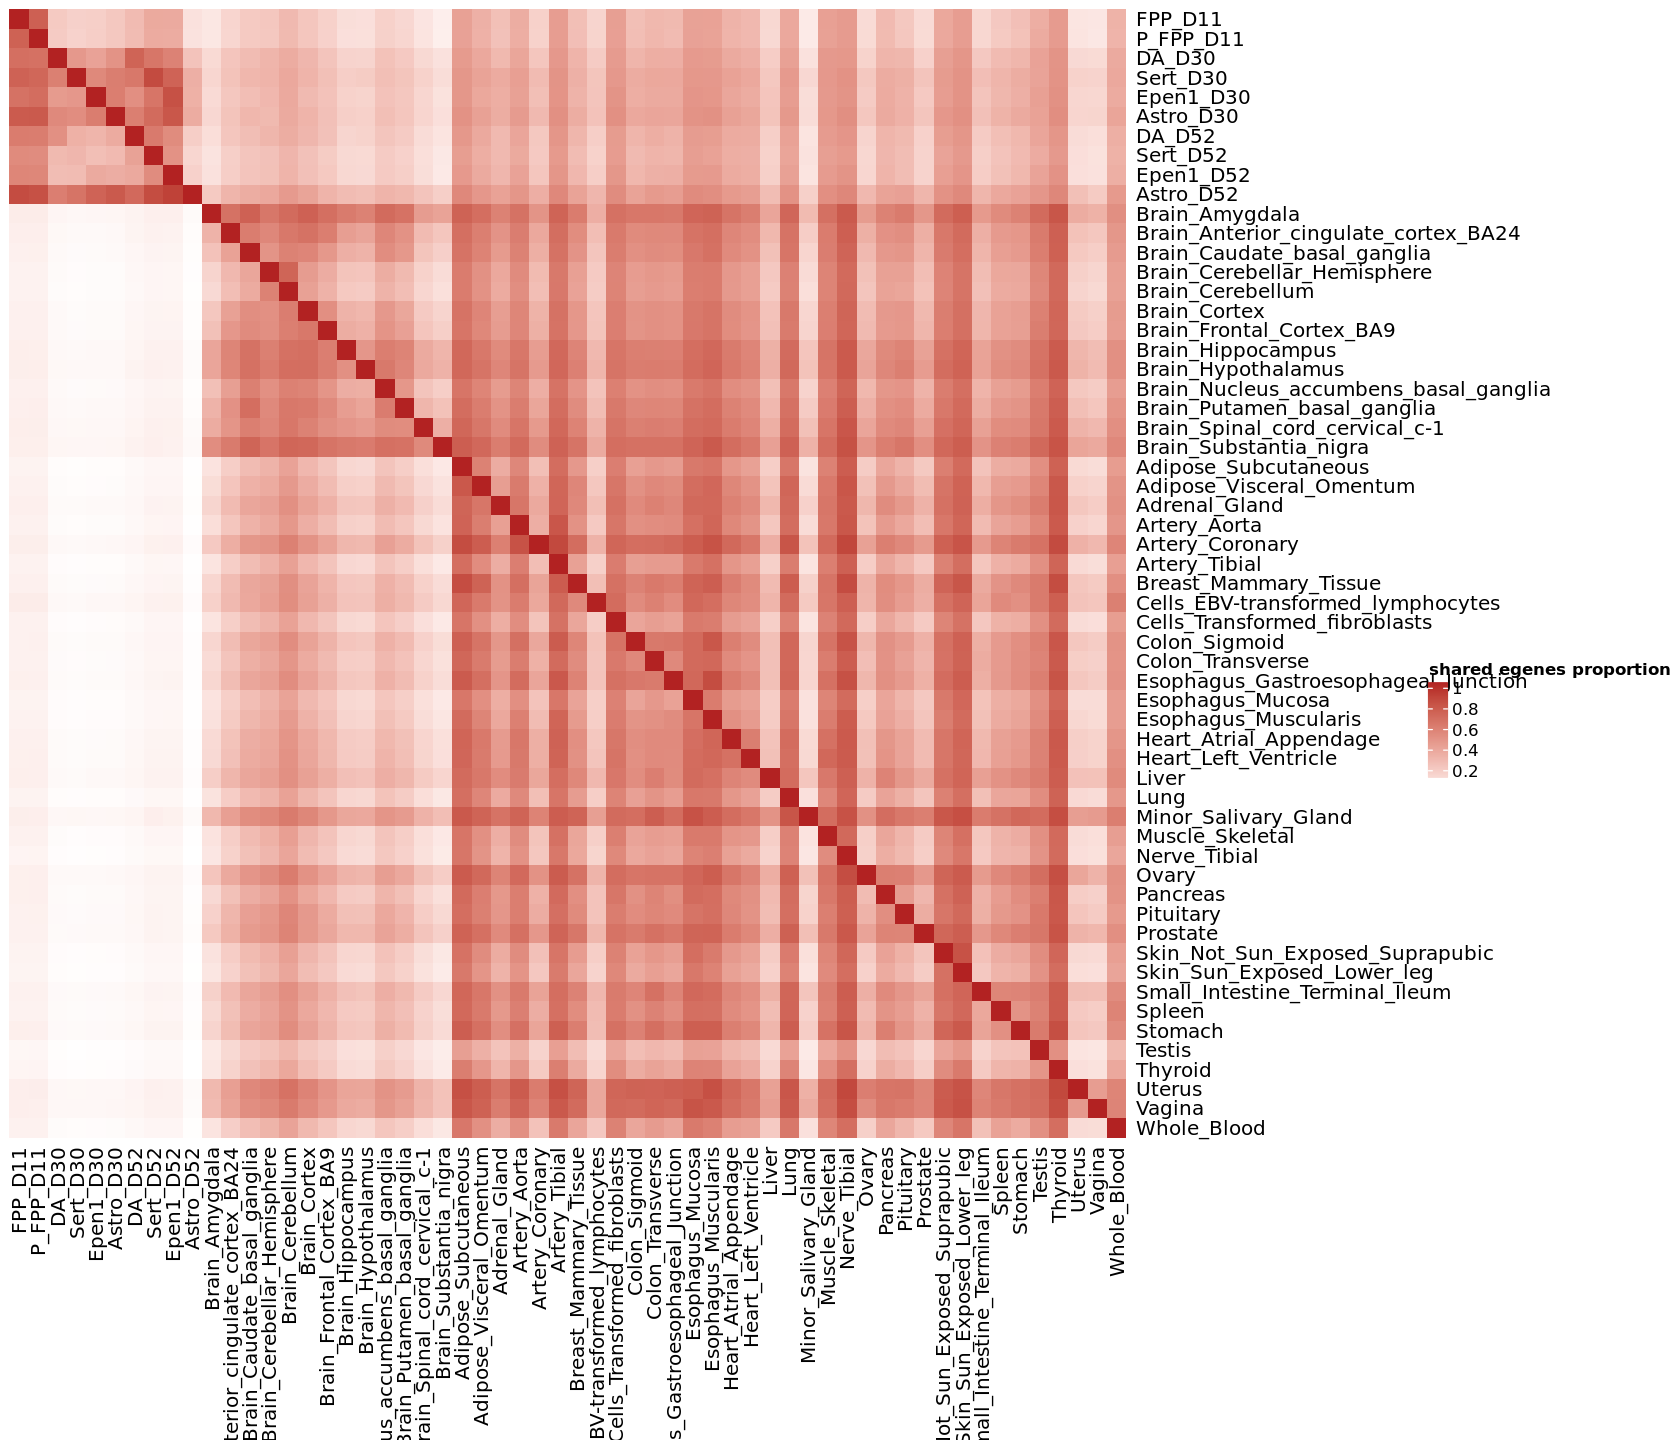

In [223]:
# library(ComplexHeatmap)
# library(circlize)
# mat = scale(mat)
m = min(mat)
M = max(mat)
options(repr.plot.width = 14, repr.plot.height = 12)
Heatmap(mat[order(rownames(mat) %in% colnames(mat)),], cluster_rows = F, cluster_columns = F, col = colorRamp2(c(m, M), c("white", "firebrick")), 
       name = "shared egenes proportion")

In [235]:
t1 = tissues[1]
allgenes = egenes1 = egenes[[t1]]
for (i in 2:length(tissues)){
    t = tissues[i]
    allgenes = unique(c(allgenes,egenes[[t]]))
}

In [240]:
commongenes = c()
for (gene in allgenes){
    n = 0
    for (i in 1:length(tissues)){
        t = tissues[i]
        if (gene %in% egenes[[t]]){
            n = n+1
        }
        if (n>ceiling(0.5*length(tissues))){
            commongenes = unique(c(commongenes,gene))
        }
    }
}

In [253]:
# head(allgenes)
commongenes = unique(commongenes)
length(commongenes)

[1] 2840

In [249]:
mat0 = mat

In [250]:
for (i in 1:length(tissues)){
    t1 = tissues[i]
    egenes1 = egenes[[t1]]
    egenes1 = egenes1[!(egenes1 %in% commongenes)]
#     print(t1)
#     print(head(egenes1))
    for (j in 1:length(tissues)){
        t2 = tissues[j]
        egenes2 = egenes[[t2]]
        egenes2 = egenes2[!(egenes2 %in% commongenes)]
#         print(head(egenes2))
        mat0[i,j] = sum(egenes1 %in% egenes2)/length(egenes1)

    }
}

In [251]:
mat0

,FPP_D11,P_FPP_D11,DA_D30,Sert_D30,Epen1_D30,Astro_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52,⋯,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
FPP_D11,1.00000000,0.71982116,0.201937407,0.162444113,0.172876304,0.1959761550,0.263785395,0.33830104,0.33308495,0.1020864382,⋯,0.2459016,0.3070045,0.05663189,0.10506706,0.11400894,0.2354694,0.3166915,0.020864382,0.02682563,0.2250373
P_FPP_D11,0.71238938,1.00000000,0.197640118,0.156342183,0.176253687,0.1998525074,0.263274336,0.33259587,0.32669617,0.0980825959,⋯,0.2426254,0.3104720,0.05530973,0.09734513,0.10545723,0.2573746,0.3171091,0.025073746,0.02359882,0.2160767
DA_D30,0.62298851,0.61609195,1.000000000,0.404597701,0.360919540,0.4367816092,0.701149425,0.59310345,0.51954023,0.2137931034,⋯,0.1954023,0.2505747,0.05057471,0.08735632,0.07586207,0.2114943,0.2643678,0.016091954,0.02298851,0.1770115
Sert_D30,0.66463415,0.64634146,0.536585366,1.000000000,0.484756098,0.5243902439,0.582317073,0.81402439,0.65853659,0.3018292683,⋯,0.1554878,0.2073171,0.05487805,0.06097561,0.06402439,0.1615854,0.2195122,0.009146341,0.02439024,0.1402439
Epen1_D30,0.59487179,0.61282051,0.402564103,0.407692308,1.000000000,0.5153846154,0.453846154,0.55897436,0.77179487,0.2794871795,⋯,0.1897436,0.2512821,0.04102564,0.08205128,0.08974359,0.2282051,0.2641026,0.015384615,0.02820513,0.1487179
Astro_D30,0.70889488,0.73045822,0.512129380,0.463611860,0.541778976,1.0000000000,0.549865229,0.61994609,0.73584906,0.3180592992,⋯,0.1994609,0.2318059,0.04043127,0.08355795,0.08625337,0.1725067,0.2560647,0.002695418,0.03234501,0.1509434
DA_D52,0.56279809,0.56756757,0.484896661,0.303656598,0.281399046,0.3243243243,1.000000000,0.57074722,0.47853736,0.1748807631,⋯,0.2321145,0.2813990,0.05564388,0.09538951,0.08903021,0.2305246,0.2766296,0.019077901,0.01430843,0.1669316
Sert_D52,0.48817204,0.48494624,0.277419355,0.287096774,0.234408602,0.2473118280,0.386021505,1.00000000,0.43870968,0.1387096774,⋯,0.2268817,0.2849462,0.05698925,0.09462366,0.10752688,0.2129032,0.2838710,0.016129032,0.01935484,0.1795699
Epen1_D52,0.51438435,0.50978136,0.260069045,0.248561565,0.346375144,0.3141542002,0.346375144,0.46950518,1.00000000,0.1645569620,⋯,0.2416571,0.3049482,0.06904488,0.10241657,0.10471807,0.2485616,0.3210587,0.023014960,0.02761795,0.1933257
Astro_D52,0.81065089,0.78698225,0.550295858,0.585798817,0.644970414,0.6982248521,0.650887574,0.76331361,0.84615385,1.0000000000,⋯,0.1597633,0.2011834,0.00591716,0.04733728,0.07100592,0.1775148,0.2366864,0.023668639,0.01775148,0.1301775


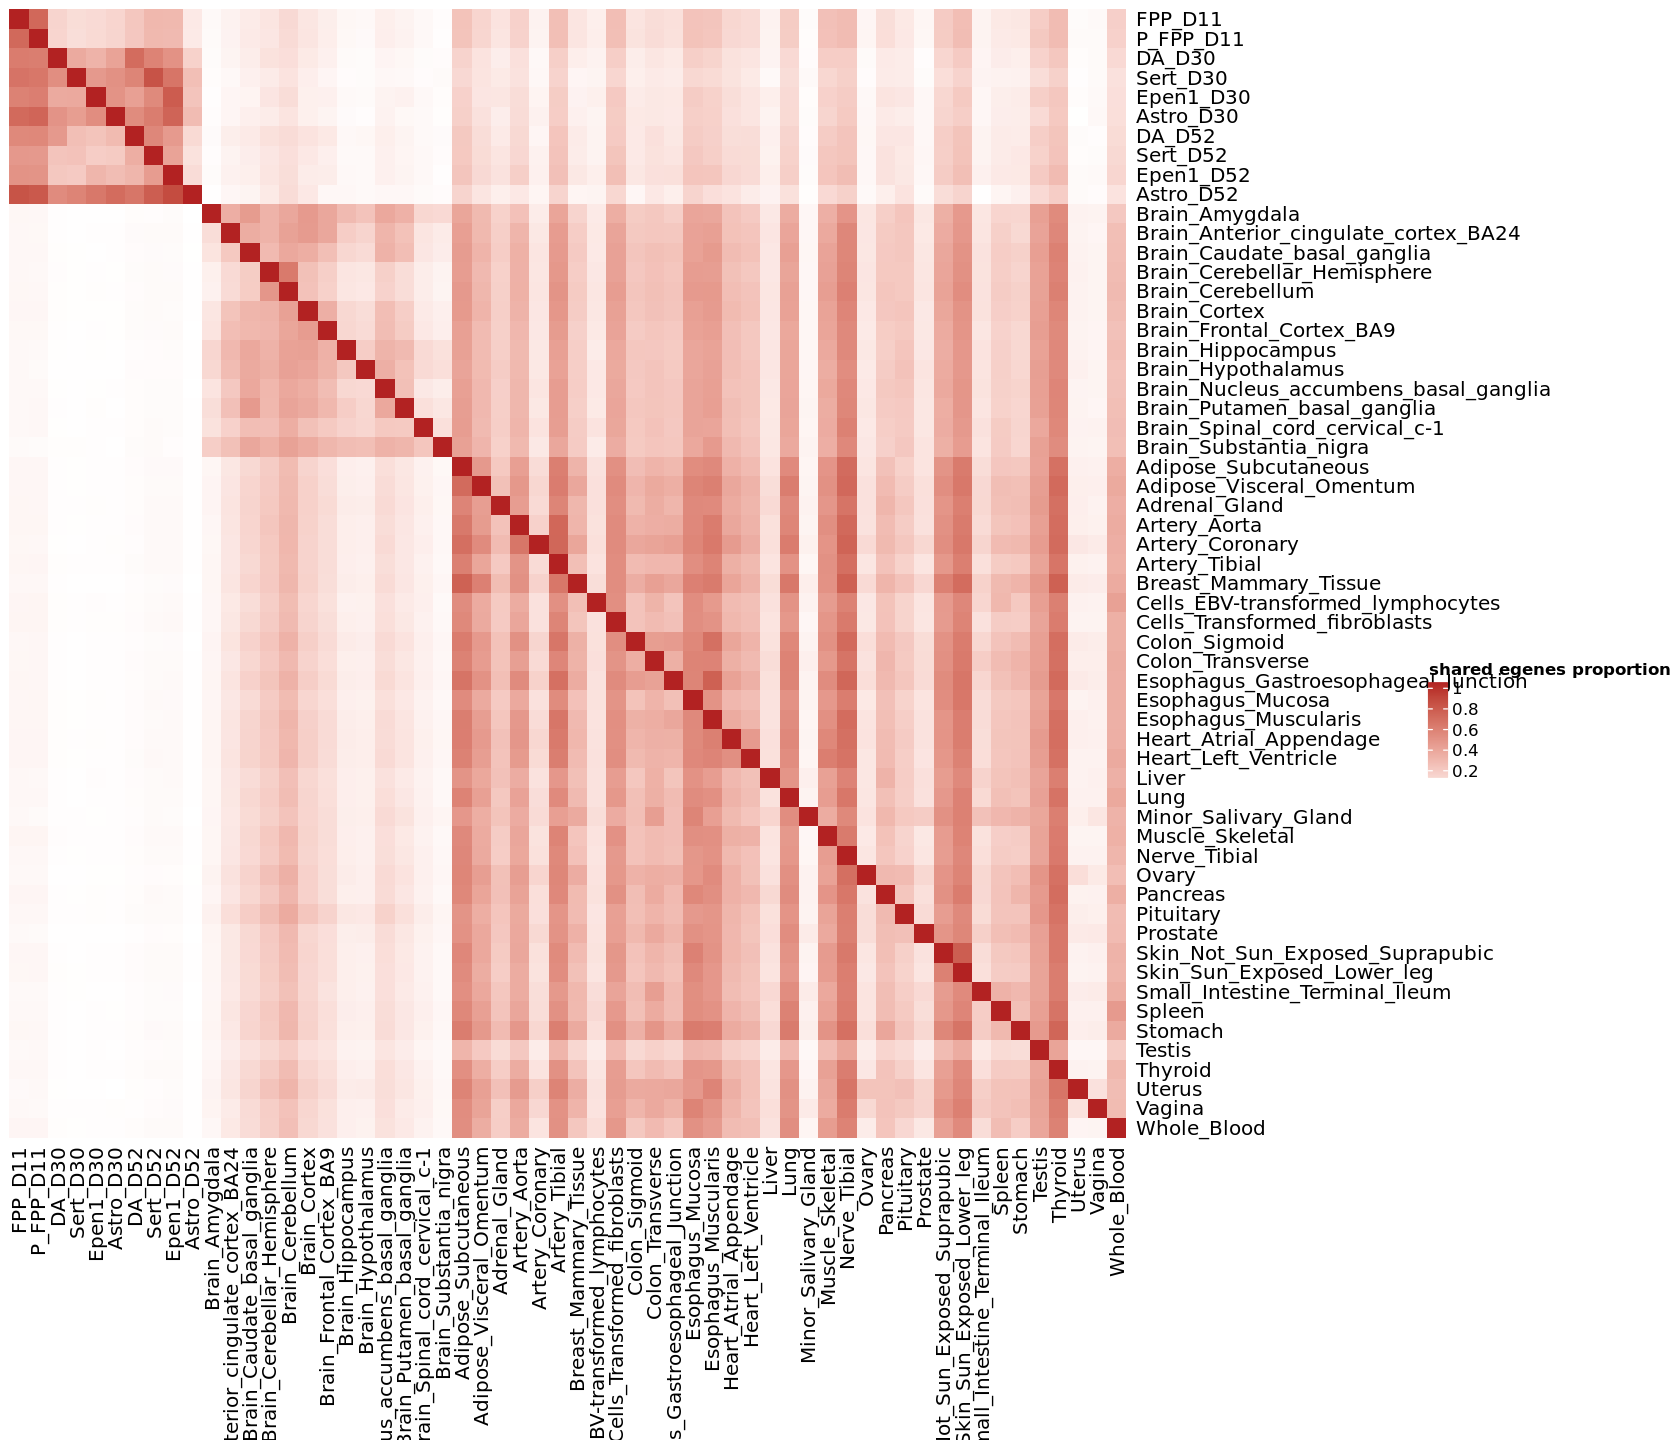

In [252]:
m = min(mat0)
M = max(mat0)
options(repr.plot.width = 14, repr.plot.height = 12)
Heatmap(mat0, cluster_rows = F, cluster_columns = F, col = colorRamp2(c(m, M), c("white", "firebrick")), 
       name = "shared egenes proportion")

In [126]:
i = 29
t1 = keys(egenes)[i]
egenes1 = egenes[[t1]]
j = 1
t2 = keys(egenes)[j]
egenes2 = egenes[[t2]]
mat[i,j] = sum(egenes1 %in% egenes2)

In [127]:
t1
length(egenes1)

[1] "Epen1_D30"

[1] 621

In [128]:
t2

[1] "Adipose_Subcutaneous"

In [125]:
mat[i,j]

[1] 0

In [91]:
length(egenes1)
length(egenes2)

[1] 8991

[1] 11866

In [92]:
sum(egenes1 %in% egenes2)
sum(egenes2 %in% egenes1)

[1] 7121

[1] 7121

In [224]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

In [41]:
eqtls <- c(length(egenes[["FPP_D11"]]),length(egenes[['P_FPP_D11']]),
           length(egenes[["DA_D30"]]),length(egenes[['Sert_D30']]),length(egenes[["Epen1_D30"]]),length(egenes[['Astro_D30']]),
           length(egenes[["DA_D52"]]),length(egenes[['Sert_D52']]),length(egenes[["Epen1_D52"]]),length(egenes[['Astro_D52']]))
eqtls

[1] 1781 1799  672  545  621  617  933 1316 1251  316

In [33]:
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/DA_FDR0.1.tsv",header = T)
inter_egenes = as.character(inter_ROT$combined_feature_id)
# head(inter_egenes)
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Sert_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Epen1_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
inter_ROT = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/ROT_treatment_interactions/Astro_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_ROT$combined_feature_id)))
head(inter_egenes)

[1] "ENSG00000003147_ICA1"  "ENSG00000007541_PIGQ"  "ENSG00000015532_XYLT2"
[4] "ENSG00000016391_CHDH"  "ENSG00000037474_NSUN2" "ENSG00000037757_MRI1"

In [40]:
interaction_qtl <- c(length(egenes[["FPP_D11"]][egenes[["FPP_D11"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["P_FPP_D11"]][egenes[["P_FPP_D11"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["DA_D30"]][egenes[["DA_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_D30"]][egenes[["Sert_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_D30"]][egenes[["Epen1_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_D30"]][egenes[["Astro_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["DA_D52"]][egenes[["DA_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_D52"]][egenes[["Sert_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_D52"]][egenes[["Epen1_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_D52"]][egenes[["Astro_D52"]] %in% gsub("_.*","",inter_egenes)]))

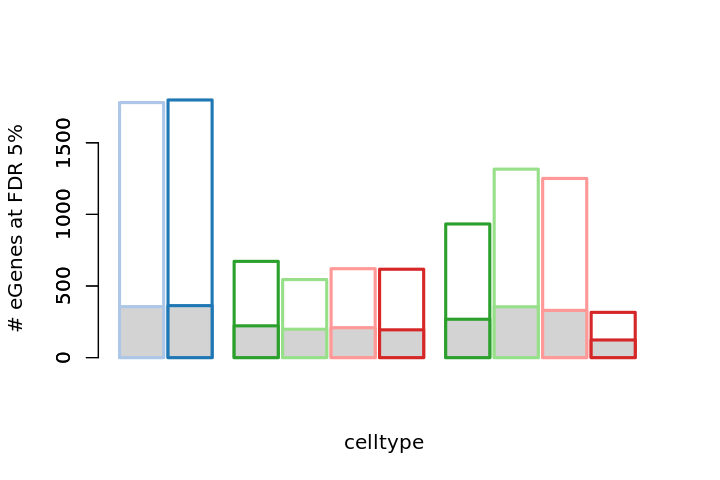

In [42]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#d62728"

options(repr.plot.width = 6, repr.plot.height = 4)
my.xlim = c(0, 1810)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

opar <- par(lwd = 2.5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(interaction_qtl, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "lightgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)


In [44]:
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/DA_FDR0.1.tsv",header = T)
inter_egenes = as.character(inter_mat$combined_feature_id)
# head(inter_egenes)
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Sert_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Epen1_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
inter_mat = read.table("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/interaction_qtl/egenes/maturation_excluding_ROT_cells/Astro_FDR0.1.tsv",header = T)
inter_egenes = unique(c(inter_egenes,as.character(inter_mat$combined_feature_id)))
head(inter_egenes)

[1] "ENSG00000001460_STPG1"   "ENSG00000004059_ARF5"   
[3] "ENSG00000005882_PDK2"    "ENSG00000006016_CRLF1"  
[5] "ENSG00000006282_SPATA20" "ENSG00000008838_MED24"

[1] "ENSG00000001460_STPG1"   "ENSG00000004059_ARF5"   
[3] "ENSG00000005882_PDK2"    "ENSG00000006016_CRLF1"  
[5] "ENSG00000006282_SPATA20" "ENSG00000008838_MED24"

In [45]:
interaction_qtl <- c(length(egenes[["FPP_D11"]][egenes[["FPP_D11"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["P_FPP_D11"]][egenes[["P_FPP_D11"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["DA_D30"]][egenes[["DA_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_D30"]][egenes[["Sert_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_D30"]][egenes[["Epen1_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_D30"]][egenes[["Astro_D30"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["DA_D52"]][egenes[["DA_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Sert_D52"]][egenes[["Sert_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Epen1_D52"]][egenes[["Epen1_D52"]] %in% gsub("_.*","",inter_egenes)]),
length(egenes[["Astro_D52"]][egenes[["Astro_D52"]] %in% gsub("_.*","",inter_egenes)]))

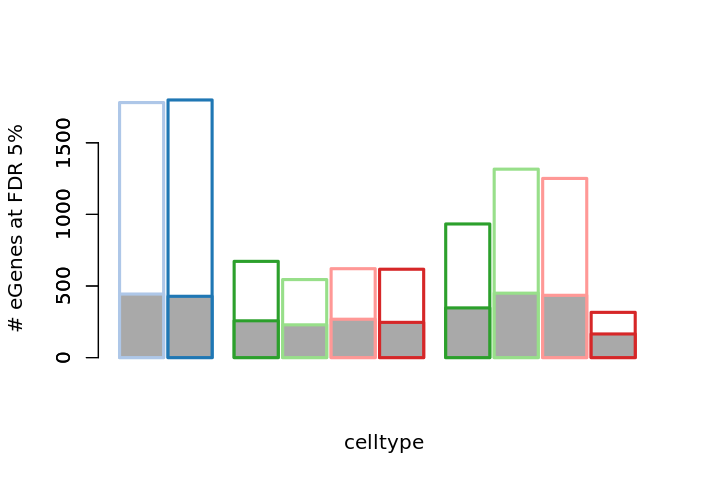

In [46]:
options(repr.plot.width = 6, repr.plot.height = 4)
my.xlim = c(0, 1810)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

opar <- par(lwd = 2.5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(interaction_qtl, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "darkgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)


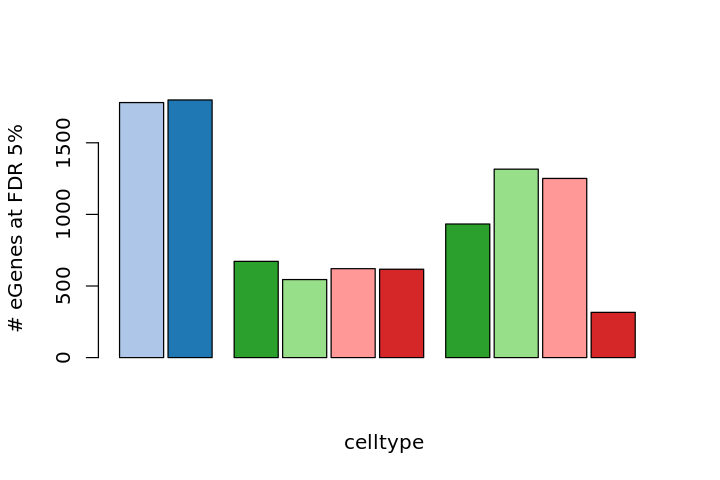

In [232]:
options(repr.plot.width = 6, repr.plot.height = 4)
eqtls <- c(length(egenes[["FPP_D11"]]),length(egenes[['P_FPP_D11']]),
           length(egenes[["DA_D30"]]),length(egenes[['Sert_D30']]),length(egenes[["Epen1_D30"]]),length(egenes[['Astro_D30']]),
           length(egenes[["DA_D52"]]),length(egenes[['Sert_D52']]),length(egenes[["Epen1_D52"]]),length(egenes[['Astro_D52']]))


my.xlim = c(0, 1810)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [ ]:
#### compare to number of donors per celltype

In [315]:
n <- c(173, 172,
       165, 151, 133, 152,
      179,171,175,137)

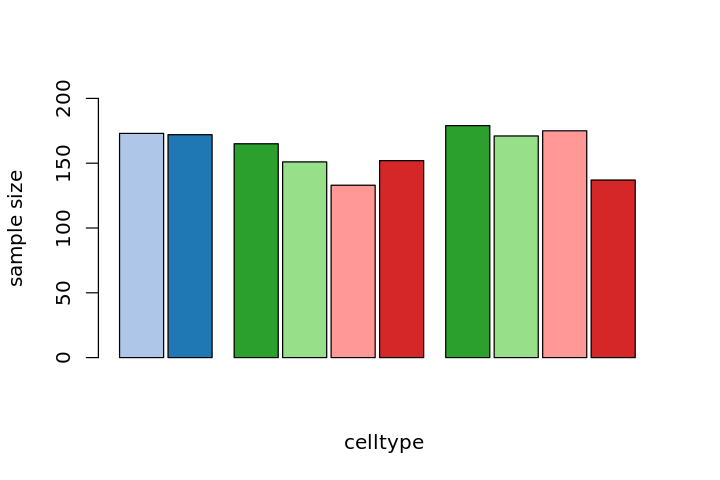

In [317]:
options(repr.plot.width = 6, repr.plot.height = 4)

my.xlim = c(0, 200)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

# opar <- par(lwd = 5)
barplot(n, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
#         col = "white",
        col = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "sample size",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)


In [ ]:
#### compare to number of cells per celltype

In [ ]:
genes_tested <- c(2180, 2134,
                 )

In [ ]:
#### check sharedness within dataset (# common egenes)

In [257]:
eqtls <- c(length(egenes[["FPP_D11"]]),length(egenes[['P_FPP_D11']]),
           length(egenes[["DA_D30"]]),length(egenes[['Sert_D30']]),length(egenes[["Epen1_D30"]]),length(egenes[['Astro_D30']]),
           length(egenes[["DA_D52"]]),length(egenes[['Sert_D52']]),length(egenes[["Epen1_D52"]]),length(egenes[['Astro_D52']]))

In [258]:
eqtls

[1] 1781 1799  672  545  621  617  933 1316 1251  316

In [294]:
eqtls_unique <- c(0,0,0,0,0,0,0,0,0,0)
eqtls_shared_max2 <- c(0,0,0,0,0,0,0,0,0,0)
eqtls_shared_atleast3 <- c(0,0,0,0,0,0,0,0,0,0)

for (i in 1:length(celltypes)){
# for (i in 1){
    celltype = celltypes[i]
    egs = egenes[[celltype]]
    for (gene in egs){
#         print(gene)
        n = 0
        for (ct in celltypes){
            if (gene %in% egenes[[ct]]){
                n = n+1
            }
        }
        if (n == 1){eqtls_unique[i] = eqtls_unique[i]+1}
        if (n > 1 && n <= 3){eqtls_shared_max2[i] = eqtls_shared_max2[i]+1}
        if (n > 3){eqtls_shared_atleast3[i] = eqtls_shared_atleast3[i]+1}
    }
}

In [295]:
eqtls_unique + eqtls_shared_max2 + eqtls_shared_atleast3
eqtls

[1] 1781 1799  672  545  621  617  933 1316 1251  316

[1] 1781 1799  672  545  621  617  933 1316 1251  316

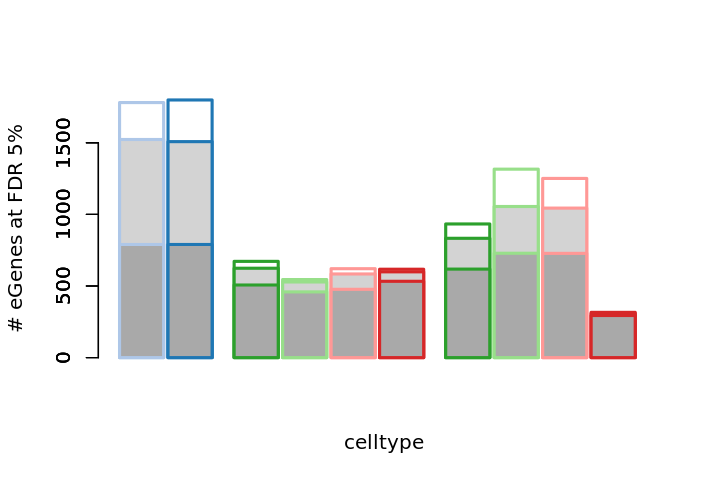

In [306]:
options(repr.plot.width = 6, repr.plot.height = 4)
my.xlim = c(0, 1810)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

opar <- par(lwd = 2.5)
barplot(as.numeric(eqtls), 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(eqtls_shared_max2+eqtls_shared_atleast3, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "lightgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)

barplot(eqtls_shared_atleast3, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "darkgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)

In [307]:
length(brain_tissues)

[1] 13

In [311]:
eqtls1 <- c(0,0,0,0,0,0,0,0,0,0)
eqtls2 <- c(0,0,0,0,0,0,0,0,0,0)
eqtls3 <- c(0,0,0,0,0,0,0,0,0,0)
eqtls4 <- c(0,0,0,0,0,0,0,0,0,0)

for (i in 1:length(celltypes)){
# for (i in 1){
    celltype = celltypes[i]
    egs = egenes[[celltype]]
    for (gene in egs){
#         print(gene)
        n = 0
        for (ct in brain_tissues){
            if (gene %in% egenes[[ct]]){
                n = n+1
            }
        }
        if (n == 0){eqtls1[i] = eqtls1[i]+1}
        if (n > 0 && n <= 2){eqtls2[i] = eqtls2[i]+1}
        if (n > 2 && n <= 6){eqtls3[i] = eqtls3[i]+1}
        if (n > 6){eqtls4[i] = eqtls4[i]+1}
    }
}

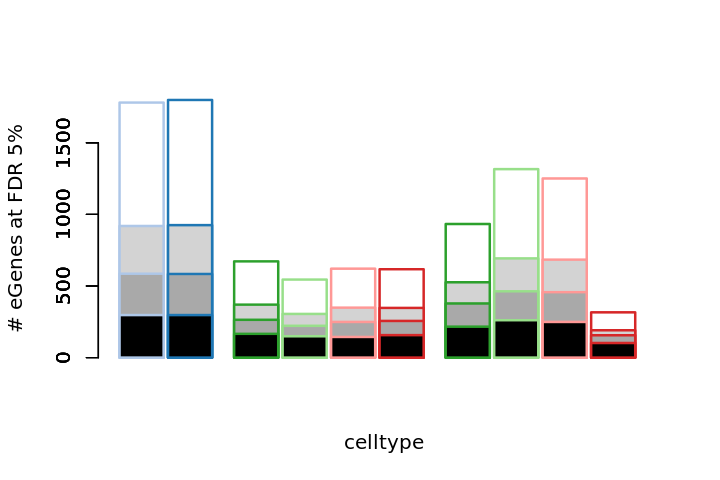

In [318]:
options(repr.plot.width = 6, repr.plot.height = 4)
my.xlim = c(0, 1810)
my.ylim = c(0,12)
my.space = c(0, 0.1, 0.5, 0.1, 0.1, 0.1, 0.5, 0.1, 0.1,0.1)

opar <- par(lwd = 2)
barplot(eqtls1+eqtls2+eqtls3+eqtls4, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "white",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlab = "celltype", ylab = "# eGenes at FDR 5%",
        xlim = my.ylim, ylim = my.xlim, space = my.space)#, 
#         width = 0.5, xlab = "% eQTLs overlapping H3K27ac", horiz = TRUE, las = 1)

barplot(eqtls2+eqtls3+eqtls4, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "lightgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)

barplot(eqtls3+eqtls4, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "darkgrey",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)


barplot(eqtls4, 
#         border = c(col_ips,col_mesendo,col_day1,col_defendo,col_day3),
        col = "black",
        border = c(col_FPP, col_P_FPP,
                col_DA, col_Sert, col_Epen1, col_Astro,
                col_DA, col_Sert, col_Epen1, col_Astro),
        xlim = my.ylim, ylim = my.xlim, space = my.space, ylab = "", add = T)